<a href="https://colab.research.google.com/github/Artemis601/ML/blob/master/House_Prices_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)
# **Introduction**:

In this notebook, we will predict house sales prices and practice machine learning techniques using the kaggle [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). 

**Goal**:

Our objective is to develop a model that can predict the sales price of each house. For each Id in the test set, we predict the value of the Sale Price Variable. 

It is a supervised regression task. The Machine Learning workflow will be as follows: 
1. Data Cleaning and Formatting
2. Exploratory Data Analysis
3. Feature Selection and Engineering
4. Establish a baseline and compare several models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set
7. Interpret the model results to the full extent possible
8. Draw conclusions and write a well documented report

**Evaluation Metric**:

Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

 # **Imports**:

In [0]:
# Imports
# Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np
# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

# set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_style('ticks')

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None


# internal python tool for setting figure size
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (15.0, 8.0)

# **Data Cleaning and Formatting**
## Load dataset

In [69]:
import os
os.getcwd()

'/Users/kavyaannapareddy'

In [70]:
path_train= '/Users/kavyaannapareddy/Desktop/Projects/python/wip/train.csv'
path_test= '/Users/kavyaannapareddy/Desktop/Projects/python/wip/test.csv'
house_train_data = pd.read_csv(path_train, index_col= 'Id')
house_test_data= pd.read_csv(path_test, index_col='Id')
y_train= house_train_data['SalePrice']
house_all_data= pd.concat([house_train_data, house_test_data])
house= house_all_data.copy()
house.drop(['SalePrice'], axis= 1, inplace= True)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

In [71]:
print('The size of dataset is: ', house.shape)

The size of dataset is:  (2919, 79)


There are 79 features excluding Sale Price which is our target variable, 1460 rows of training data and 1459 rows of testing data. 


## What do the columns mean?

Data fields

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


# Missing Values

Since the number of features are very high, we draw a table with count of missing values and their % of the total values.

In [72]:
# Create a function to calculate Missing values table
def missing_value(df):
  # missing values by column
  missing_val= df.isnull().sum()
  # % of missing values
  missing_val_percent = missing_val * 100/ len(df)
  # creating a table with values and percentage amounts
  missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
  missing_val_table_rename= missing_val_table.rename(columns= {0:'missing values count', 1:'% of missing values'})
  missing_val_table_rename_sort= missing_val_table_rename[missing_val_table_rename.iloc[:,0]!=0].sort_values(by='missing values count', ascending=False).round(1)
  print('Your dataframe has {} columns of which {} contain missing values'.format(df.shape[1], len(missing_val_table_rename_sort)))


  return missing_val_table_rename_sort


missing_value(house)

Your dataframe has 79 columns of which 34 contain missing values


missing values count  % of missing values
PoolQC                        2909                 99.7
MiscFeature                   2814                 96.4
Alley                         2721                 93.2
Fence                         2348                 80.4
FireplaceQu                   1420                 48.6
LotFrontage                    486                 16.6
GarageFinish                   159                  5.4
GarageQual                     159                  5.4
GarageCond                     159                  5.4
GarageYrBlt                    159                  5.4
GarageType                     157                  5.4
BsmtExposure                    82                  2.8
BsmtCond                        82                  2.8
BsmtQual                        81                  2.8
BsmtFinType2                    80                  2.7
BsmtFinType1                    79                  2.7
MasVnrType                      24                  0.8
MasVnrArea                      23                  0.8
MSZoning                         4                  0.1
BsmtFullBath                     2                  0.1
BsmtHalfBath                     2                  0.1
Functional                       2                  0.1
Utilities                        2                  0.1
GarageArea                       1                  0.0
GarageCars                       1                  0.0
Electrical                       1                  0.0
KitchenQual                      1                  0.0
TotalBsmtSF                      1                  0.0
BsmtUnfSF                        1                  0.0
BsmtFinSF2                       1                  0.0
BsmtFinSF1                       1                  0.0
Exterior2nd                      1                  0.0
Exterior1st                      1                  0.0
SaleType                         1                  0.0

There are 34 features with missing values. A column with high percentage of missing values isn't of much value. Although it is adviced to be careful before dropping columns. So, I looked at the data description for more detail and noticed that certain features have NA representing absence of that feature which is being consided as missing values. We need to correct them. 

I first manually make a list of those columns and replace NA with None

In [73]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [0]:
col_list_NA = ['Alley','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
               'PoolQC', 'Fence', 'MiscFeature' ]

In [0]:
for feature in col_list_NA:
  house[feature]= house[feature].fillna('None')
  

Let's check for missing values again.

In [76]:
missing_value(house)

Your dataframe has 79 columns of which 20 contain missing values


missing values count  % of missing values
LotFrontage                    486                 16.6
GarageYrBlt                    159                  5.4
MasVnrType                      24                  0.8
MasVnrArea                      23                  0.8
MSZoning                         4                  0.1
BsmtFullBath                     2                  0.1
Utilities                        2                  0.1
Functional                       2                  0.1
BsmtHalfBath                     2                  0.1
GarageArea                       1                  0.0
GarageCars                       1                  0.0
KitchenQual                      1                  0.0
TotalBsmtSF                      1                  0.0
Electrical                       1                  0.0
BsmtUnfSF                        1                  0.0
BsmtFinSF2                       1                  0.0
BsmtFinSF1                       1                  0.0
Exterior2nd                      1                  0.0
Exterior1st                      1                  0.0
SaleType                         1                  0.0

If there is no garage, then 'GarageYrBlt' will be empty. It has the same number of missing values as other garage related features we saw earlier. I am replacing these missing vales with the median value as placing a zero throws the dataset off. 

I use the median values for numerical variables and most frequent strategy for categorical variables from our training data to fill in rest of the missing values .

Let's look at the dtypes of our features to identify numerical and categorical ones. 


In [77]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

The variables 'MSSubClass' , 'MoSold' and 'YrSold' have been classified incorrectly. All of them are categorical variables. 

## convert correct data types

In [0]:
house['MSSubClass']= house['MSSubClass'].astype('category')
house['MoSold']= house['MoSold'].astype('category')
house['YrSold']= house['YrSold'].astype('category')

I create separate dataframe to be able to deal with the different data types effectively.

In [79]:
# selecting only numerical features
num_features_df= house.select_dtypes(include=['float64','int64'])
cat_features_df= house.select_dtypes(include=['object', 'category'])
num_features_list= num_features_df.columns
cat_features_list= cat_features_df.columns
print('There are {} numerical features and {} categorical features in our dataset'.format(len(num_features_list),len(cat_features_list)))

There are 33 numerical features and 46 categorical features in our dataset


## Dealing with Missing Values

In [80]:
from statistics import median, mode
for feature in missing_value(house).index:
  if feature in num_features_df.columns:
    num_features_df[feature]= num_features_df[feature].fillna(median(house_train_data[feature]))
  else:
    cat_features_df[feature]= cat_features_df[feature].fillna(mode(house_train_data[feature]))



Your dataframe has 79 columns of which 20 contain missing values


In [81]:
missing_value(num_features_df)

Your dataframe has 33 columns of which 1 contain missing values


missing values count  % of missing values
LotFrontage                   486                 16.6

In [82]:
missing_value(cat_features_df)

Your dataframe has 46 columns of which 0 contain missing values


Empty DataFrame
Columns: [missing values count, % of missing values]
Index: []

In [83]:
print('There are {} missing values in LotFrontage and the median value is {}'.format(house['LotFrontage'].isna().sum(),median(house_train_data['LotFrontage'])))


There are 486 missing values in LotFrontage and the median value is nan


A more intuitive way to fill these missing values is by filling with the median values of the neighborhood. Borrowed from [here](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

In [0]:
num_features_df['LotFrontage'] = house.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


After going through the description of individual variables and their datatypes, I have grouped them into categorical and numerical lists. The two variables overall quality and condition, although inherently categorical, can be considered numerical for our anlysis. As they go from 1-10, the quality improves from very poor to very excellent. 

The variables YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' aren't necessarily numerical. However, newer the building, lower its age counted as of present and higher the expected price given same set of features. 

In [85]:
num_features_df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  2919.000000    2919.000000  2919.000000  2919.000000  2919.000000   
mean     69.542994   10168.114080     6.089072     5.564577  1971.312778   
std      21.703256    7886.996359     1.409947     1.113131    30.291442   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      60.000000    7478.000000     5.000000     5.000000  1953.500000   
50%      70.000000    9453.000000     6.000000     5.000000  1973.000000   
75%      80.000000   11570.000000     7.000000     6.000000  2001.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean    1984.264474   102.715827   441.403392    49.565262   560.743577   
std       20.894344   178.719398   455.534012   169.179104   439.471040   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1965.000000     0.000000     0.000000     0.000000   220.000000   
50%     1993.000000     0.000000   369.000000     0.000000   467.000000   
75%     2004.000000   167.500000   733.000000     0.000000   805.000000   
max     2010.000000  1600.000000  5644.000000  1526.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  2919.000000  2919.000000  2919.000000   2919.000000  2919.000000   
mean   1051.756937  1159.581706   336.483727      4.694416  1500.759849   
std     440.692138   392.362079   428.701456     46.396825   506.051045   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     793.000000   876.000000     0.000000      0.000000  1126.000000   
50%     990.000000  1082.000000     0.000000      0.000000  1444.000000   
75%    1302.000000  1387.500000   704.000000      0.000000  1743.500000   
max    6110.000000  5095.000000  2065.000000   1064.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2919.000000   2919.000000  2919.000000  2919.000000   2919.000000   
mean       0.429599      0.061322     1.568003     0.380267      2.860226   
std        0.524676      0.245608     0.552969     0.502872      0.822693   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     4.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   2919.000000   2919.000000  2919.000000  2919.000000  2919.000000   
mean       1.044536      6.451524     0.597122  1979.686879     1.766701   
std        0.214462      1.569379     0.646129    25.717636     0.761506   
min        0.000000      2.000000     0.000000  1895.000000     0.000000   
25%        1.000000      5.000000     0.000000  1961.500000     1.000000   
50%        1.000000      6.000000     1.000000  1984.000000     2.000000   
75%        1.000000      7.000000     1.000000  2003.000000     2.000000   
max        3.000000     15.000000     4.000000  2207.000000     5.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  2919.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean    472.877013    93.709832    47.486811      23.098321     2.602261   
std     215.357944   126.526589    67.575493      64.244246    25.188169   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     320.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    26.000000       0.000000     0.000000   
75%     576.000000   168.000000    70.000000       0.000000

So far, we identified columns with missing values and imputed them. After careful study of data description, we segregated the columns into numerical and categorical. Let's look at what the data is trying to tell us.

# **Exploratory Data Analysis** 

We try to find  anomalies, trends and interesting relationships amongst variables that can be used to make modelling decisions. We first visualize single/univariate variables, followed by bivariate analysis. EDA helps us extract good explanatory variables intuitively which can be fed to our ML algorithms. 

# Target variable

We first plot the distribution to look at the center, spread , modality and heaviness of the tails. 

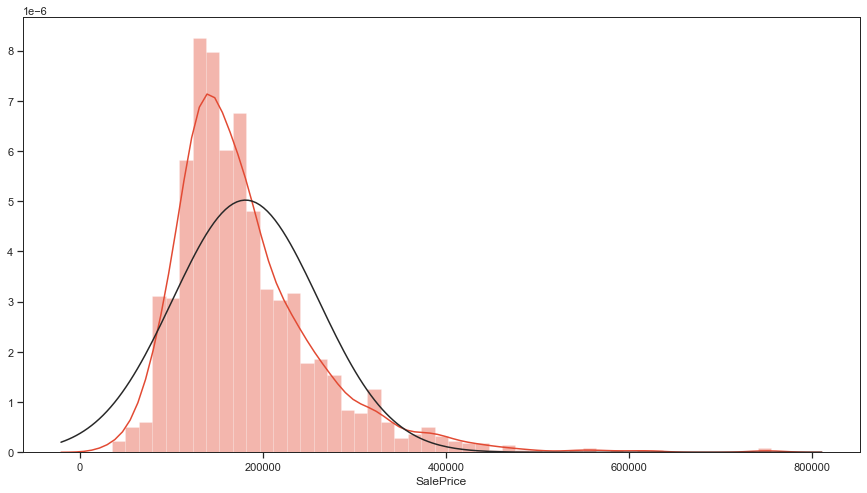

In [86]:
# traget class distribution
from scipy.stats import norm
sns.distplot(y_train, fit=norm)

The Sale Price is skewed to the right, leptokurtic and deviates from normal distribution. The positive skew creates outliers in the boxplot. Let's take a closer look at them.

Yes, there are extreme values but nothing seems to be abnormal to be defined as an outlier. However, linear models assume normally distributed data, we apply logarithmic transformation to reduce the skew of the SalePrice variable.

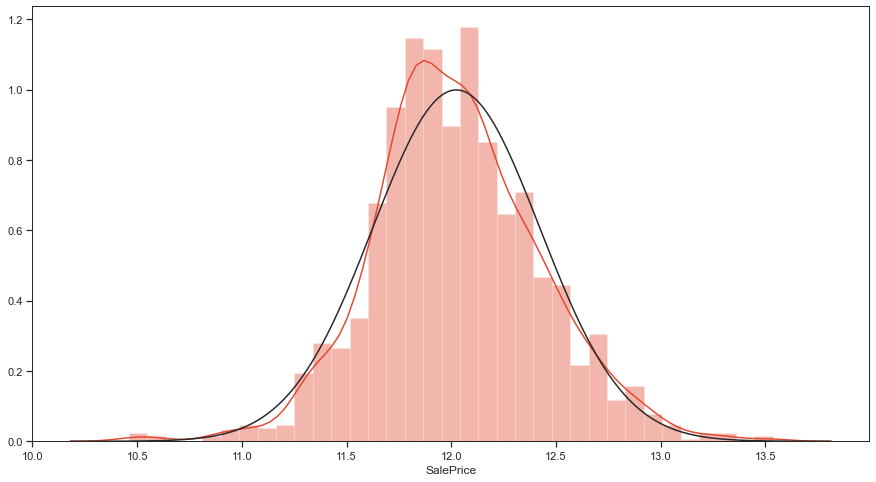

In [87]:
figsize(15,8)
sns.distplot(np.log1p(y_train), fit= norm)

Text(0.5, 1.0, 'Probablity plot after log transformation')

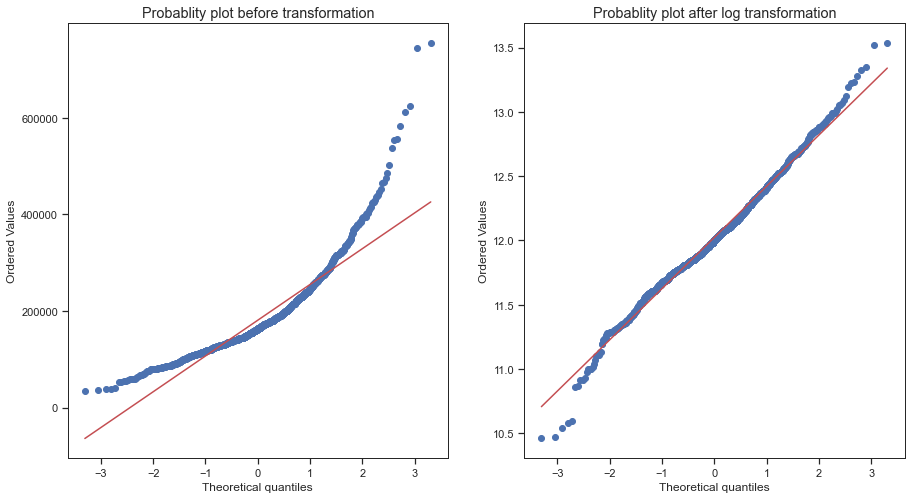

In [88]:
# plot QQ plot
from scipy import stats
fig, (ax1,ax2) =plt.subplots(1,2)
before= stats.probplot(y_train, plot= ax1)
ax1.set_title('Probablity plot before transformation')
after = stats.probplot(np.log1p(y_train), plot= ax2)
ax2.set_title('Probablity plot after log transformation')

The Sale price data now appears to be more normally distributed.

# Look for relationships
## Numerical features

Let's put together the Sale Price and numerical features togther for ease of analysis and generation of plots


In [89]:
house_all_data['SalePrice'].shape

(2919,)

In [90]:
num_features_df.shape

(2919, 33)

In [91]:
num_house_df= pd.concat([num_features_df, house_all_data['SalePrice']], axis=1)
num_house_df

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1            65.0     8450            7            5       2003          2003   
2            80.0     9600            6            8       1976          1976   
3            68.0    11250            7            5       2001          2002   
4            60.0     9550            7            5       1915          1970   
5            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
2915         21.0     1936            4            7       1970          1970   
2916         21.0     1894            4            5       1970          1970   
2917        160.0    20000            5            7       1960          1996   
2918         62.0    10441            5            5       1992          1992   
2919         74.0     9627            7            5       1993          1994   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
Id                                                                           
1          196.0       706.0         0.0      150.0        856.0       856   
2            0.0       978.0         0.0      284.0       1262.0      1262   
3          162.0       486.0         0.0      434.0        920.0       920   
4            0.0       216.0         0.0      540.0        756.0       961   
5          350.0       655.0         0.0      490.0       1145.0      1145   
...          ...         ...         ...        ...          ...       ...   
2915         0.0         0.0         0.0      546.0        546.0       546   
2916         0.0       252.0         0.0      294.0        546.0       546   
2917         0.0      1224.0         0.0        0.0       1224.0      1224   
2918         0.0       337.0         0.0      575.0        912.0       970   
2919        94.0       758.0         0.0      238.0        996.0       996   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                              
1          854             0       1710           1.0           0.0         2   
2            0             0       1262           0.0           1.0         2   
3          866             0       1786           1.0           0.0         2   
4          756             0       1717           1.0           0.0         1   
5         1053             0       2198           1.0           0.0         2   
...        ...           ...        ...           ...           ...       ...   
2915       546             0       1092           0.0           0.0         1   
2916       546             0       1092           0.0           0.0         1   
2917         0             0       1224           1.0           0.0         1   
2918         0             0        970           0.0           1.0         1   
2919      1004             0       2000           0.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                     
1            1             3             1             8           0   
2            0             3             1             6           1   
3            1             3             1             6           1   
4            0             3             1             7           1   
5            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
2915         1             3             1             5           0   
2916         1             3             1             6           0   
2917         0             4             1             7           1   
2918         0             3             1             6           0   
2919         1     

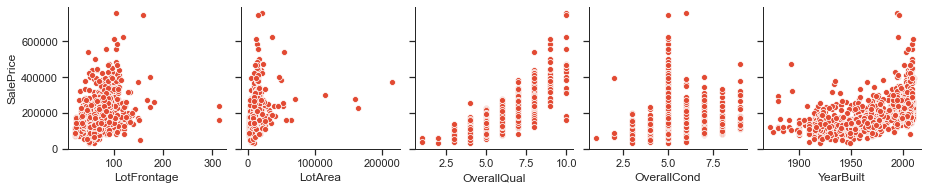

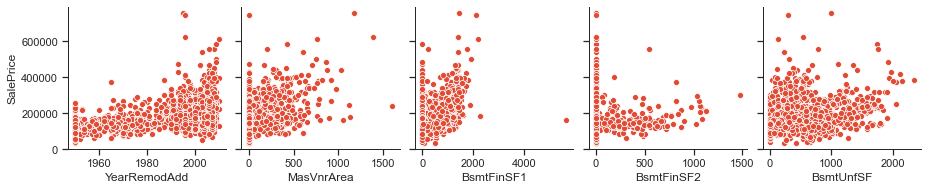

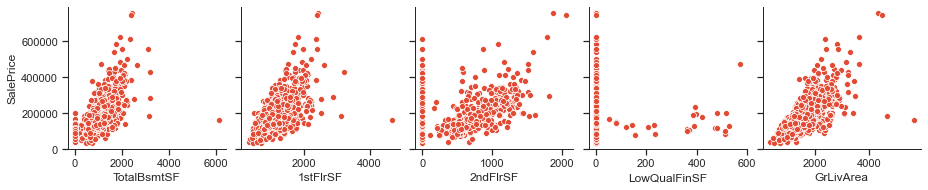

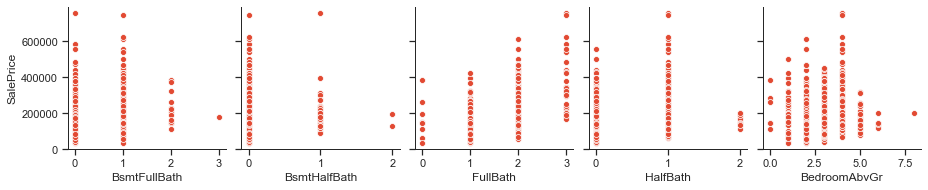

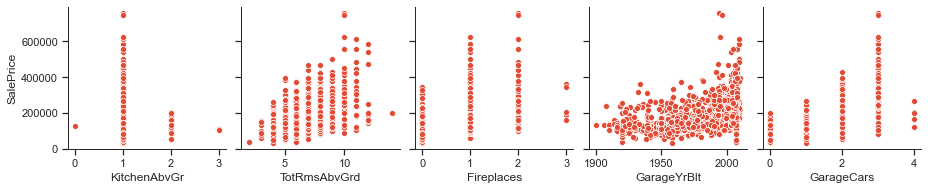

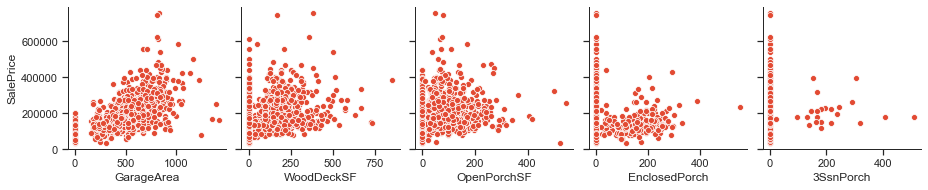

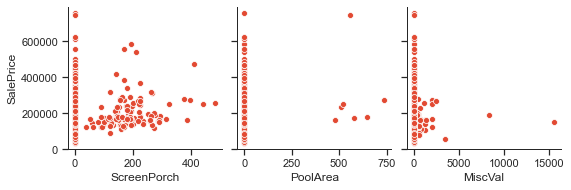

In [92]:
for i in range(0, len(num_features_list)-1,5):
  sns.pairplot(data= num_house_df, x_vars= num_features_list[i:i+5], y_vars= 'SalePrice')
  


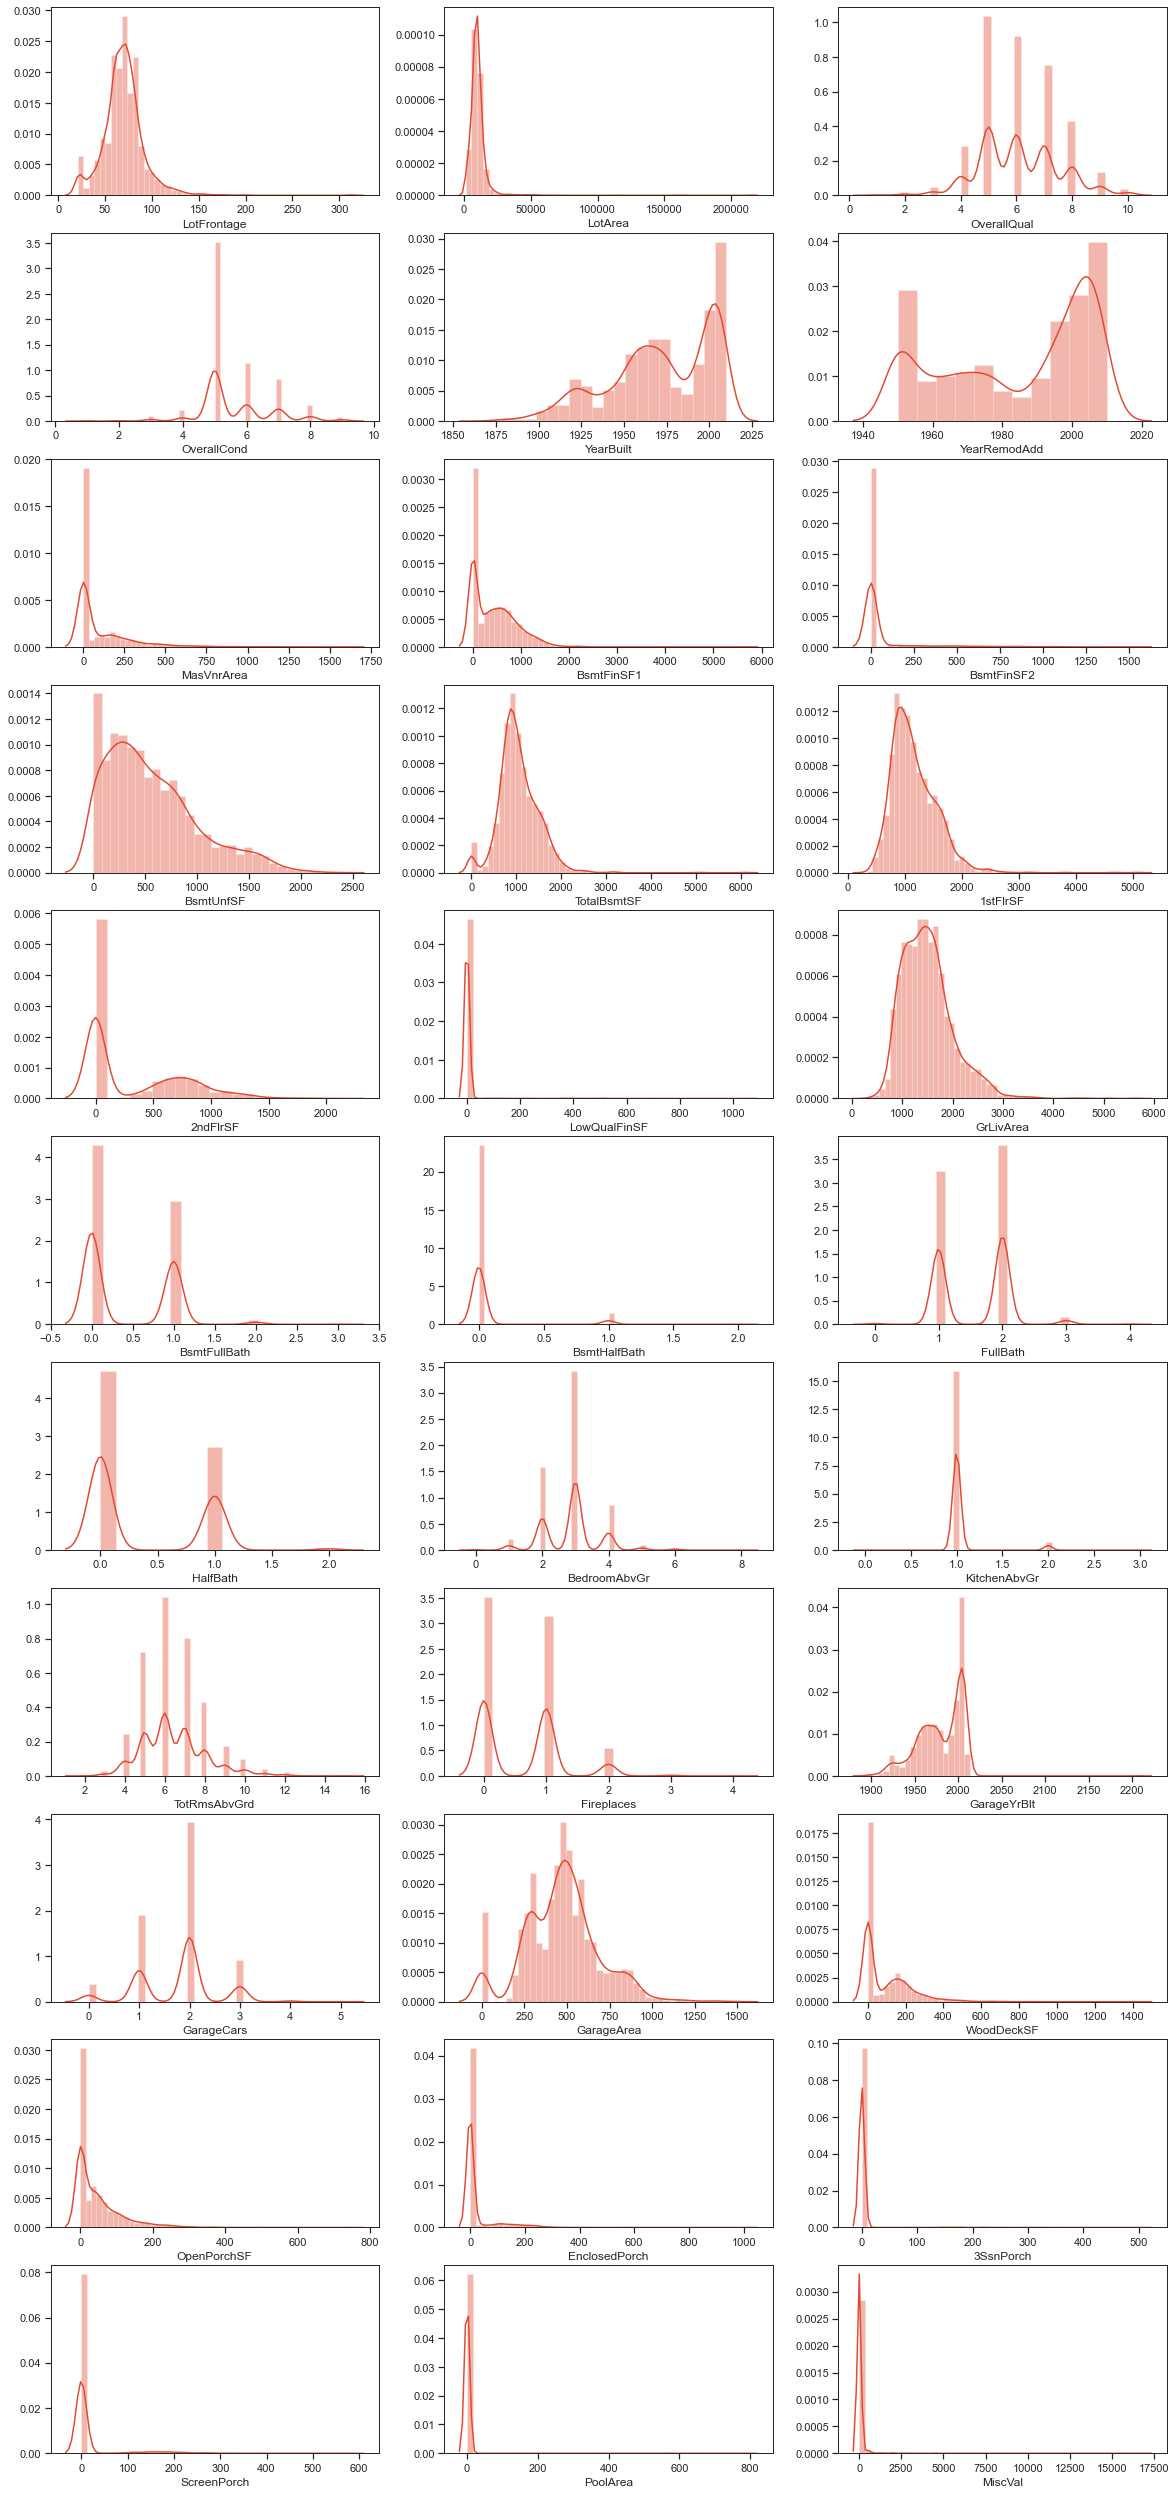

In [93]:
figsize(20,45)
fig, ax= plt.subplots(round(len(num_features_list)/3),3)
for i, ax in enumerate(fig.axes):
  sns.distplot(num_house_df[num_features_list[i]], ax=ax)


In [0]:
def corr_table(df, variable):
  corr_sort= df.corrwith(df[variable]).sort_values(ascending= False).round(2)
  corr_df= pd.DataFrame(data= corr_sort, columns=['Correlation'])
  return corr_df


In [95]:
corr_house= corr_table(num_house_df, 'SalePrice')
corr_house_high = corr_house[abs(corr_house)>0.6].dropna()
corr_house_high

Correlation
SalePrice           1.00
OverallQual         0.79
GrLivArea           0.71
GarageCars          0.64
GarageArea          0.62
TotalBsmtSF         0.61
1stFlrSF            0.61

Of the above features, GrLivArea, TotalBsmtSF and 1stFlrSF have high correlation as well as positive skew. Overall Quality has the highest correlation with sale price and is very intuitive. Garage Cars and garage area are representative of the same space. Hence, we can choose only one of the variables and drop the other.

To do:
* treat GrLivArea, TotalBsmtSF and 1stFlrSF with boxcox 1p transformation, RobustScalar before applying linear regression.
* Check if the transformed variables follow normal distribution
* drop GarageArea/GarageCars


Let's take a deeper look into these variables. How does overall quality affect the sale price with respect to each of these features?

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  from ipykernel import kernelapp as app


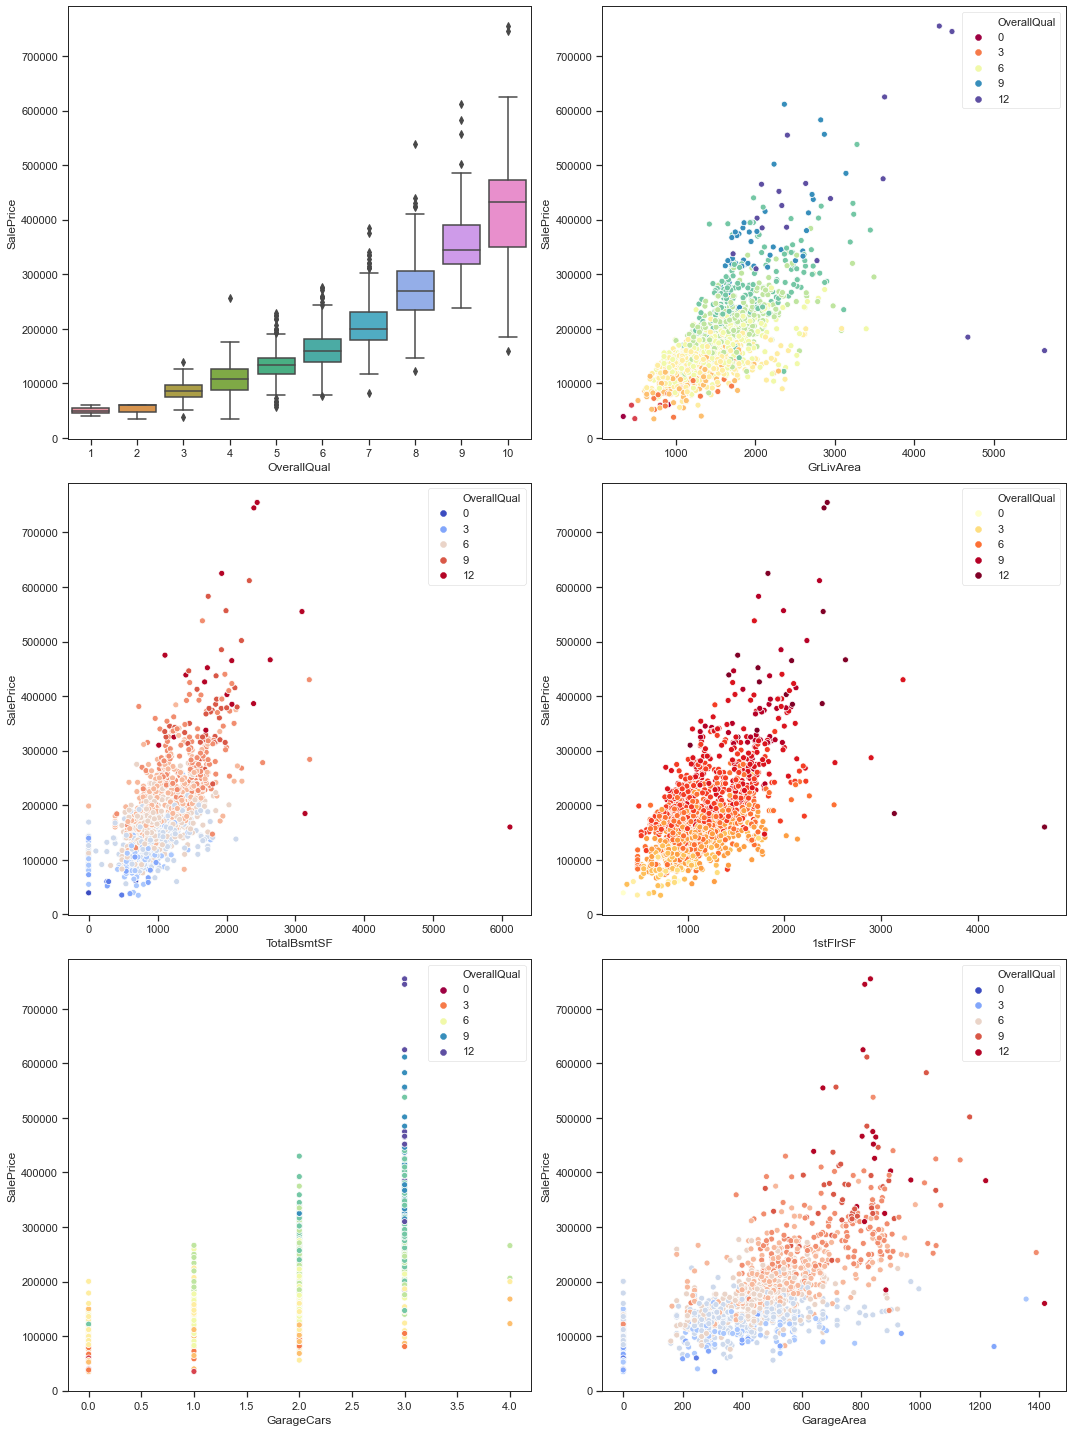

In [96]:
fig= plt.figure(constrained_layout= True, figsize=(15,20))
spec= gridspec.GridSpec(nrows= 3, ncols= 2, figure= fig)
f_ax1= fig.add_subplot(spec[0,0]);
sns.boxplot(x= 'OverallQual',y='SalePrice', data=num_house_df)
f_ax2= fig.add_subplot(spec[0,1]);
sns.scatterplot(x='GrLivArea', y='SalePrice', data=num_house_df, hue= 'OverallQual', palette='Spectral')
f_ax3= fig.add_subplot(spec[1,0]);
sns.scatterplot(x='TotalBsmtSF', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[1,1]);
sns.scatterplot(x= '1stFlrSF', y='SalePrice', data= num_house_df, hue='OverallQual', palette='YlOrRd')
f_ax5= fig.add_subplot(spec[2,0])
sns.scatterplot(x= 'GarageCars', y= 'SalePrice', data= num_house_df, hue= 'OverallQual', palette = 'Spectral')
f_ax6= fig.add_subplot(spec[2,1])
sns.scatterplot(x= 'GarageArea', y= 'SalePrice', data= num_house_df, hue= 'OverallQual', palette='coolwarm')
plt.tight_layout()

# Outliers:
I am specifically looking for high quality building points at bottom right corners. I expect that buildings of high quality and possessing more of a feature demand higher price. And if they don't, something is unsual. And unless, it has a good explanation, I would consider it an extreme observation and remove it.  

Detecting them:

in GrLivArea beyond the 4000 mark . Similarly, in 1stFlrSf, TotalBsmtSF and 1stFlrSF the points beyond the 3000 mark; GarageArea beyond the 1400 mark. These two houses are of of high quality and ideally demand high price. Hence, we consider them as outliers. 

Removing them:

In [0]:
# remove outliers
# GrLivArea
index_val_Gr = num_house_df[(num_house_df['GrLivArea']>4000) & (num_house_df['SalePrice']<200000) ].index
num_house_df = num_house_df.drop(index= index_val_Gr)

In [98]:
corr_house_medium= corr_house[(abs(corr_house) >0.1) & (abs(corr_house)<0.6)].dropna()
corr_house_medium

Correlation
FullBath              0.56
TotRmsAbvGrd          0.53
YearBuilt             0.52
YearRemodAdd          0.51
MasVnrArea            0.48
Fireplaces            0.47
GarageYrBlt           0.39
BsmtFinSF1            0.39
LotFrontage           0.35
WoodDeckSF            0.32
2ndFlrSF              0.32
OpenPorchSF           0.32
HalfBath              0.28
LotArea               0.26
BsmtFullBath          0.23
BsmtUnfSF             0.21
BedroomAbvGr          0.17
ScreenPorch           0.11
EnclosedPorch        -0.13
KitchenAbvGr         -0.14

In [99]:
corr_house_medium.index

Index(['FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath',
       'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'EnclosedPorch',
       'KitchenAbvGr'],
      dtype='object')

These features have good to low correlation. Of these, MasVnrArea, BsmtFinSF1, LotFrontage, WoodDeckSF, OpenPorchSF, ScreenPorch, EnclosedPorch have positive skew and hence need to be treated. The rest don't seem to have a skew, so, we apply just RobustScalar to these. The variables YearBuilt and YearRemodAdd can be further engineered as the age of the house counted from today. The newer the house, better the price

To do:
* Treat MasVnrArea, BsmtFinSF1, LotFrontage, WoodDeckSF, OpenPorchSF, LotArea, ScreenPorch, EnclosedPorch with boxcox 1p transformation, RobustScalar 
* Check if transformed variables follow normal distribution
* apply RobustScalar to FullBath,TotRmsAbvGrd,Fireplaces, 2ndFlrSF,HalfBath, BsmtFullBath, BsmtUnfSF, BedroomAbvGr, KitchenAbvGr
* calculate age of the house from year built, year remodelled and garage built



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  from ipykernel import kernelapp as app


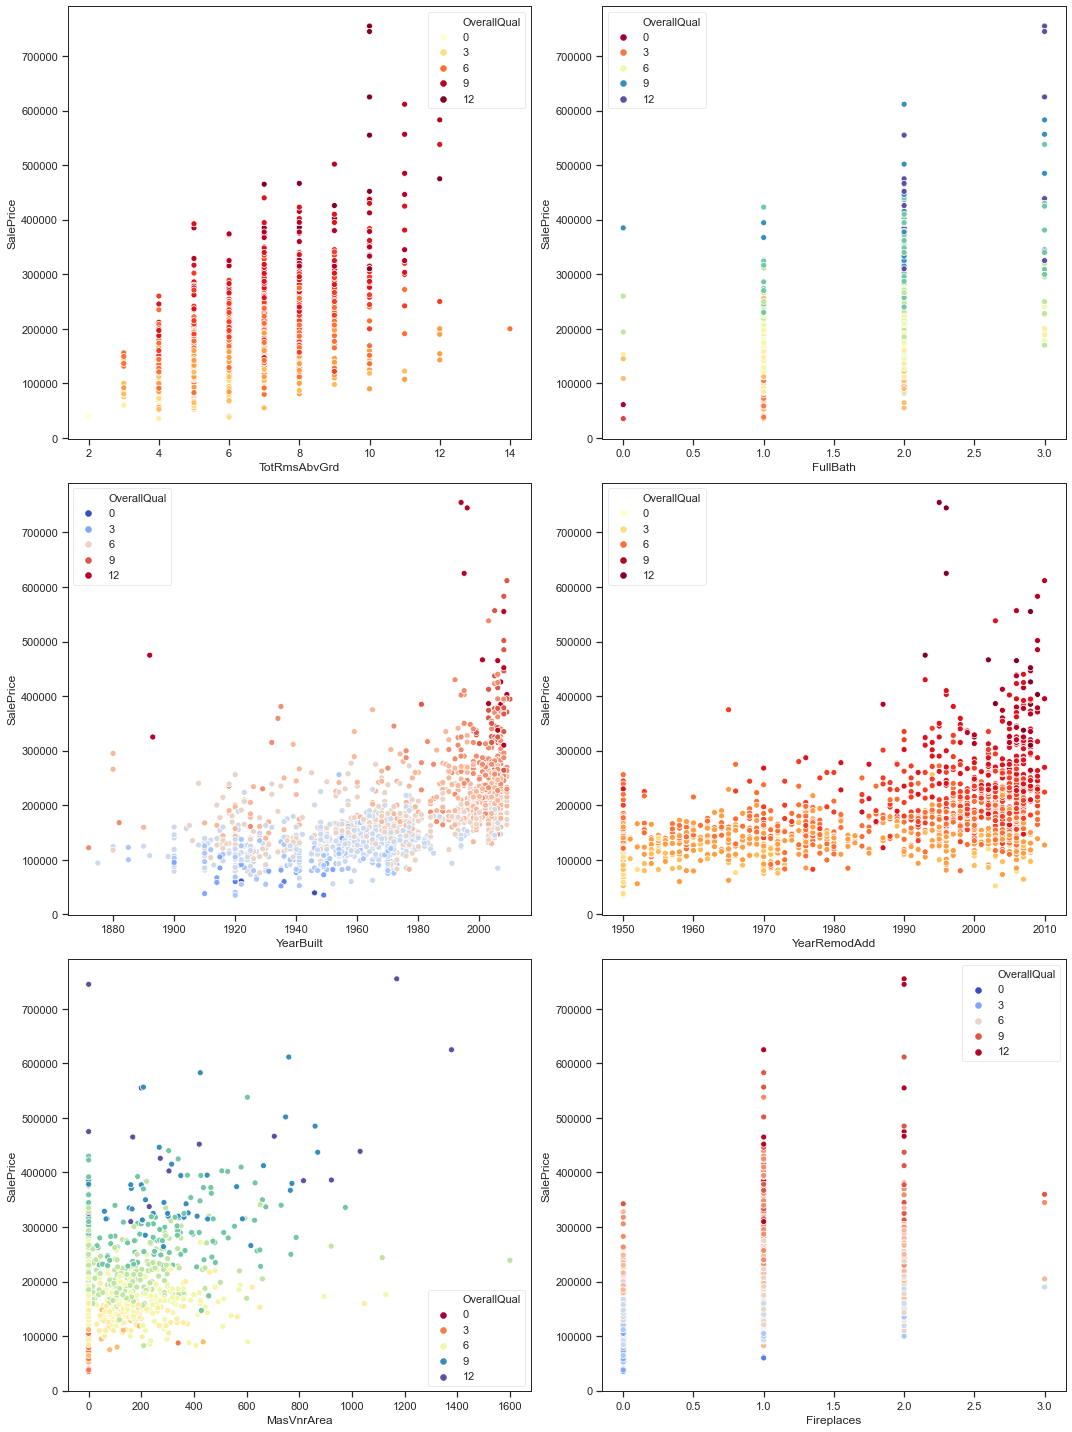

In [100]:
fig= plt.figure(constrained_layout= True, figsize=(15,20))
spec= gridspec.GridSpec(nrows= 3, ncols= 2, figure= fig)
f_ax1= fig.add_subplot(spec[0,0]);
sns.scatterplot(x= 'TotRmsAbvGrd',y='SalePrice', data=num_house_df, hue= 'OverallQual', palette='YlOrRd')
f_ax2= fig.add_subplot(spec[0,1]);
sns.scatterplot(x='FullBath', y='SalePrice', data=num_house_df, hue= 'OverallQual', palette='Spectral')
f_ax3= fig.add_subplot(spec[1,0]);
sns.scatterplot(x='YearBuilt', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[1,1]);
sns.scatterplot(x= 'YearRemodAdd', y='SalePrice', data= num_house_df, hue='OverallQual', palette='YlOrRd')
f_ax5= fig.add_subplot(spec[2,0])
sns.scatterplot(x= 'MasVnrArea', y= 'SalePrice', data= num_house_df, hue= 'OverallQual', palette = 'Spectral')
f_ax6= fig.add_subplot(spec[2,1])
sns.scatterplot(x= 'Fireplaces', y= 'SalePrice', data= num_house_df, hue= 'OverallQual', palette='coolwarm')
plt.tight_layout()

Nothing seems out of the ordinary. Newer built buildings or remodelled recently seem to command a higher price. Two of the buildings built in late 1880's command a higher price. That could be attributed to thier overall quality and subsequent recent remodelling.

In [101]:
num_house_df[ (num_house_df['YearBuilt']>1880) & (num_house_df['YearBuilt']<1900) & (num_house_df['SalePrice']> 200000)]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
186         90.0    22950           10            9       1892          1993   
584         75.0    13500           10            9       1893          2000   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
Id                                                                          
186         0.0         0.0         0.0     1107.0       1107.0      1518   
584         0.0         0.0         0.0     1237.0       1237.0      1521   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                             
186      1518           572       3608           0.0           0.0         2   
584      1254             0       2775           0.0           0.0         3   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                    
186         1             4             1            12           2   
584         1             3             1             9           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                  
186       1993.0         3.0       840.0           0          260   
584       1988.0         2.0       880.0         105          502   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  
Id                                                                        
186              0          0          410         0        0   475000.0  
584              0          0            0         0        0   325000.0

Let's take a closer look at the rest of the features

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  app.launch_new_instance()


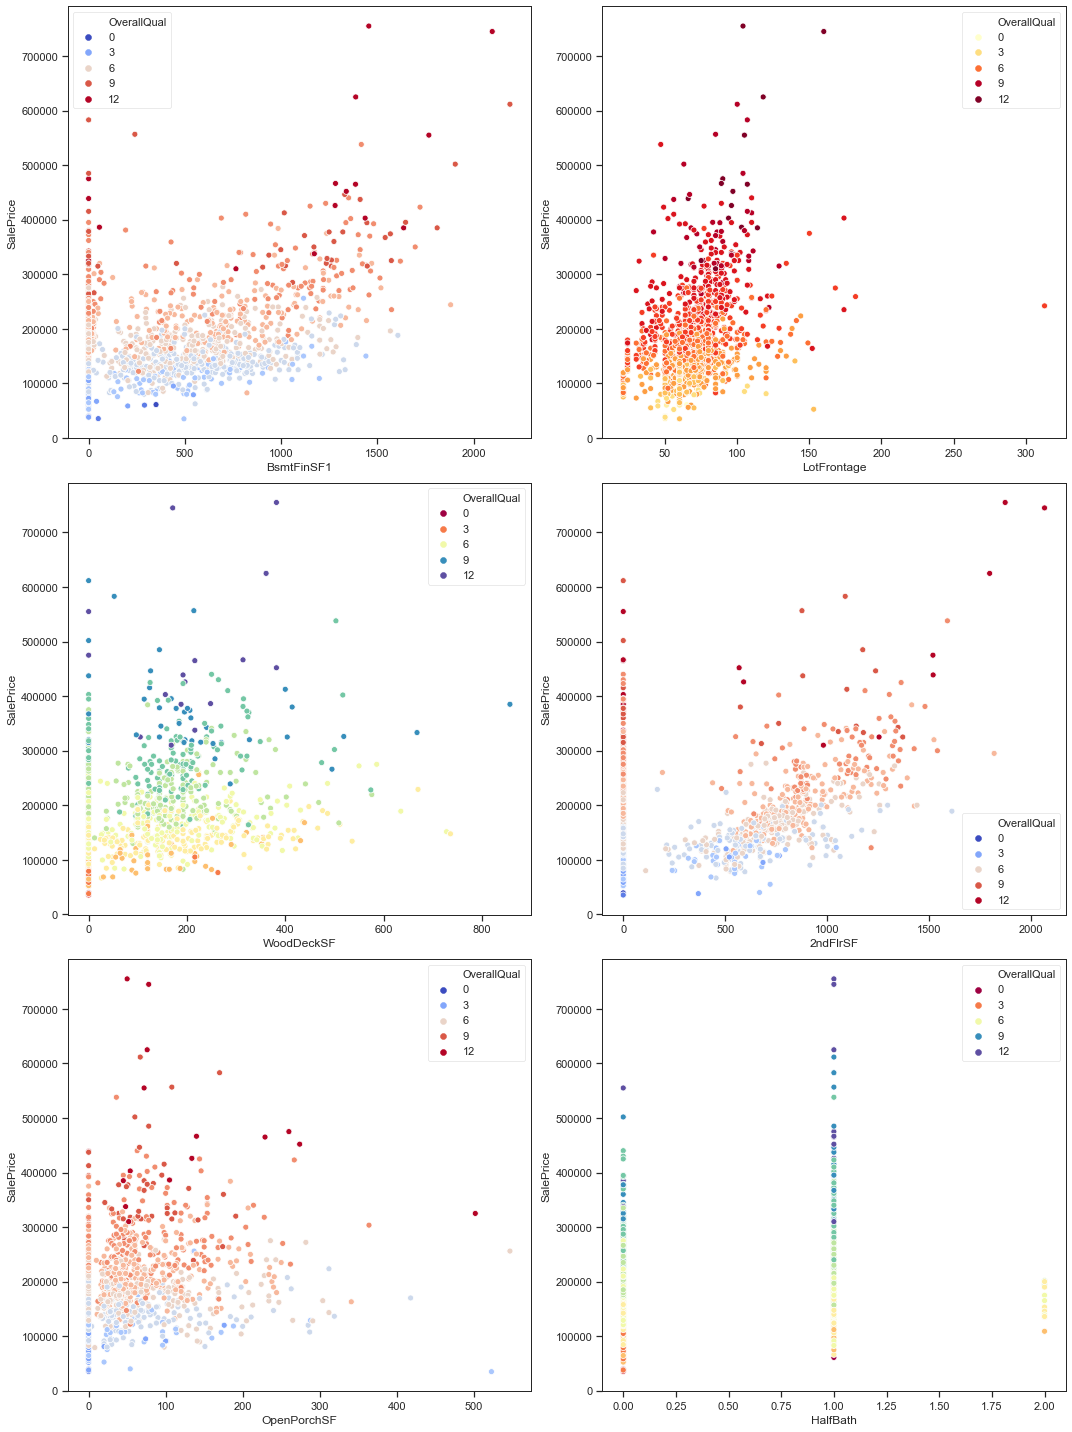

In [102]:
fig= plt.figure(constrained_layout= True, figsize=(15,20))
spec= gridspec.GridSpec(nrows= 3, ncols= 2, figure= fig)

f_ax3= fig.add_subplot(spec[0,0]);
sns.scatterplot(x='BsmtFinSF1', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[0,1]);
sns.scatterplot(x= 'LotFrontage', y='SalePrice', data= num_house_df, hue='OverallQual', palette='YlOrRd')
f_ax5= fig.add_subplot(spec[1,0])
sns.scatterplot(x= 'WoodDeckSF', y= 'SalePrice', data= num_house_df, hue= 'OverallQual', palette = 'Spectral')
f_ax6= fig.add_subplot(spec[1,1])
sns.scatterplot(x= '2ndFlrSF', y= 'SalePrice', data= num_house_df, hue= 'OverallQual', palette='coolwarm')
f_ax1= fig.add_subplot(spec[2,0]);
sns.scatterplot(x= 'OpenPorchSF',y='SalePrice', data=num_house_df,hue='OverallQual', palette='coolwarm')
f_ax2= fig.add_subplot(spec[2,1]);
sns.scatterplot(x='HalfBath', y='SalePrice', data=num_house_df, hue= 'OverallQual', palette='Spectral')
plt.tight_layout()

One building with a large lotfrontage medium quality seems to stand out from the rest. Also one with a large open porch. Let's take a closer look

In [0]:

# remove outliers
# OpenPorchArea
index_val_porch = num_house_df[(num_house_df['OpenPorchSF']>400) & (num_house_df['SalePrice']<400000) & (num_house_df['OverallQual']>9) ].index
num_house_df = num_house_df.drop(index= index_val_porch)

In [0]:
# LotFrontage
index_val_lot= num_house_df[(num_house_df['LotFrontage']>300) & (num_house_df['SalePrice']<300000)  ].index
num_house_df = num_house_df.drop(index= index_val_lot)

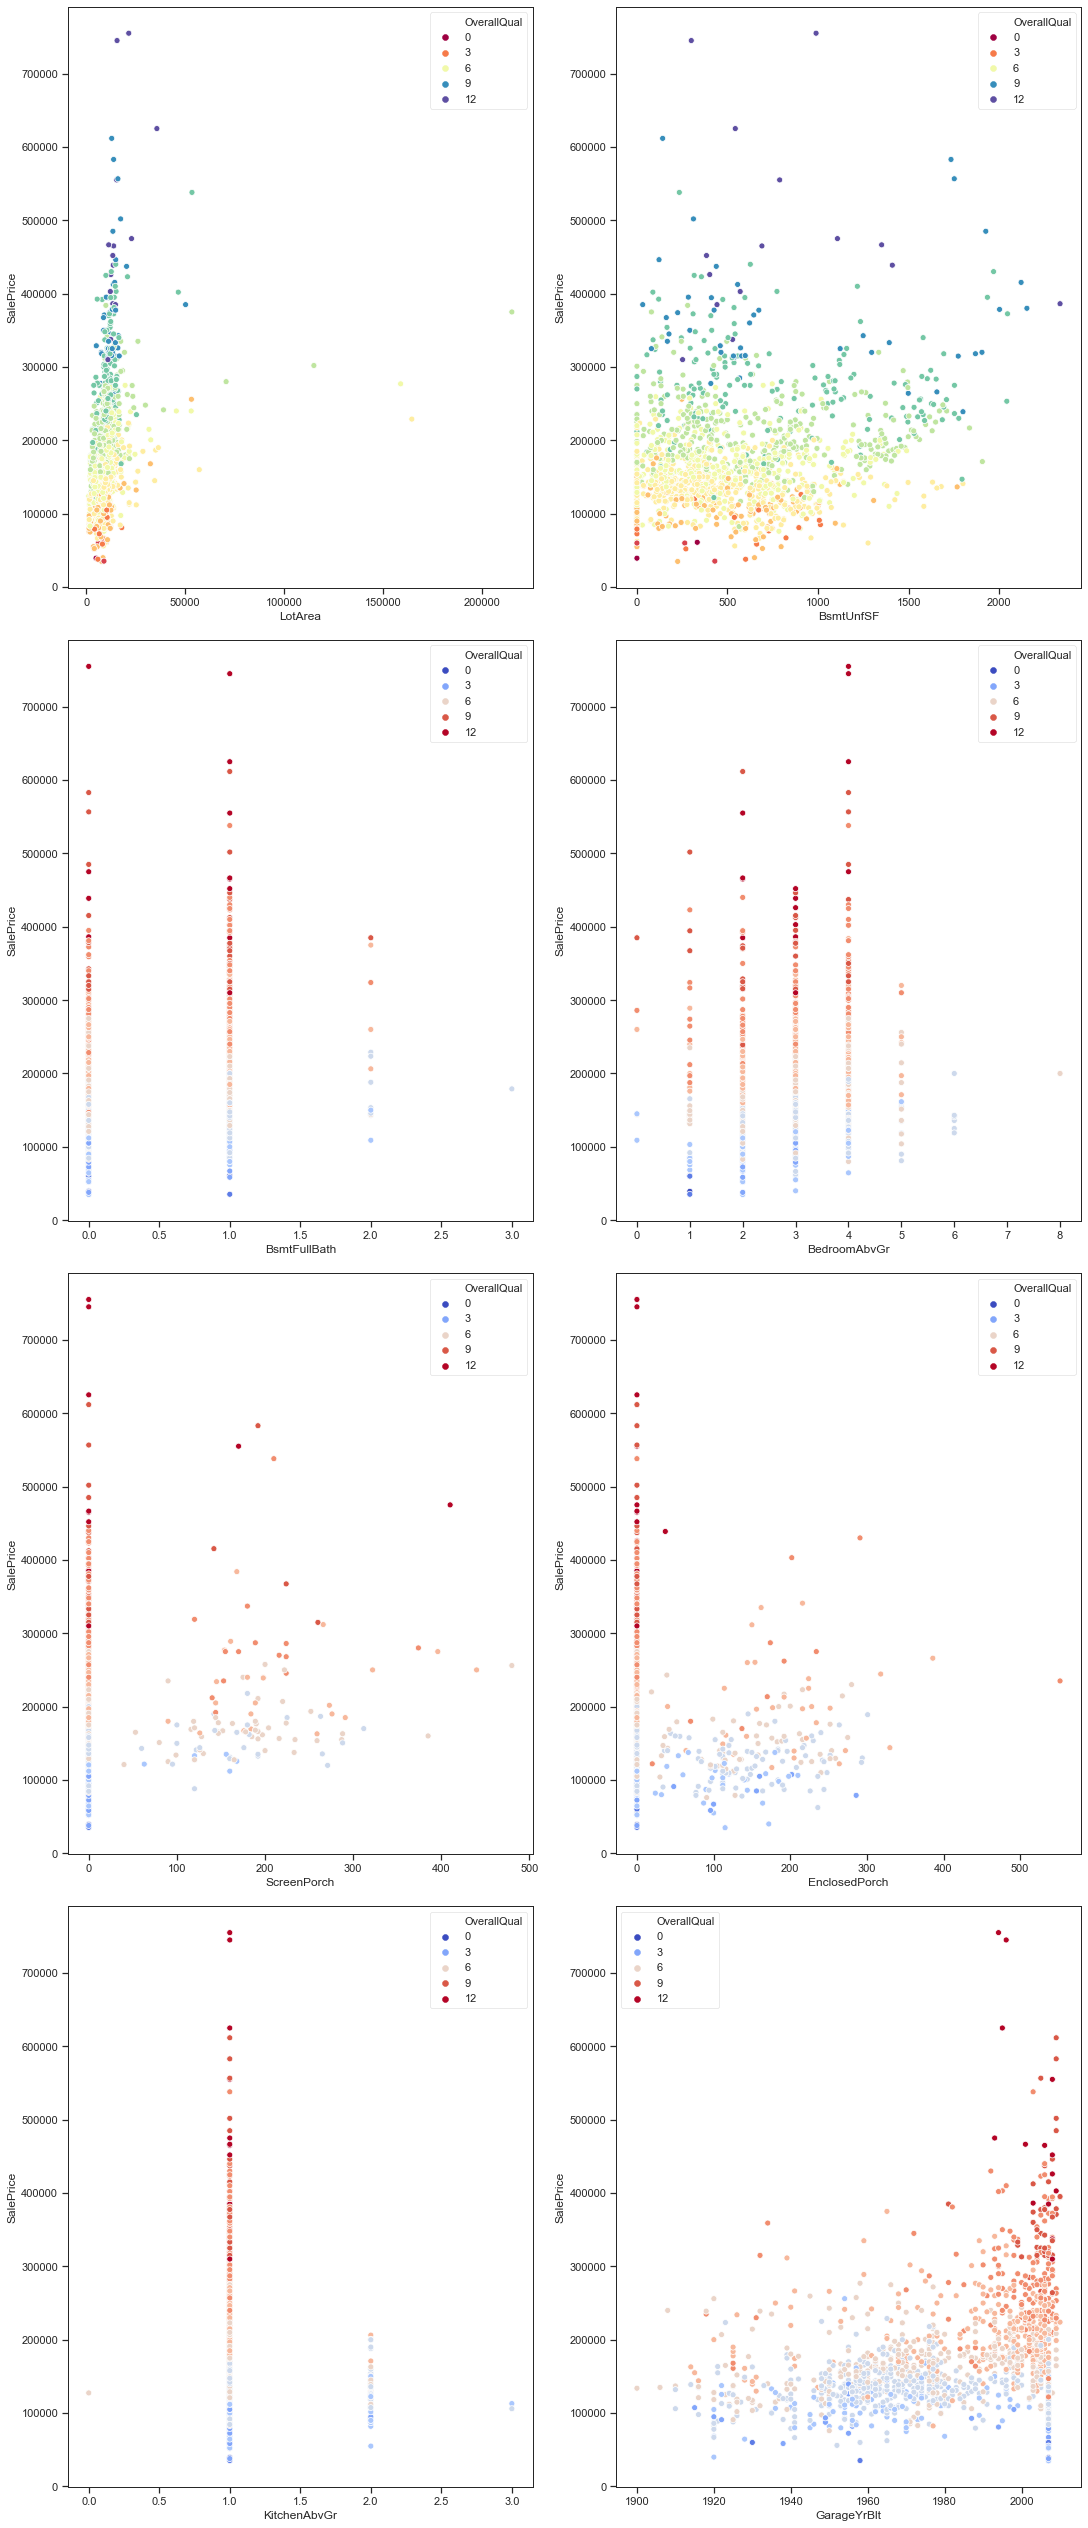

In [105]:
fig= plt.figure(constrained_layout= True, figsize=(15,35))
spec= gridspec.GridSpec(nrows= 4, ncols= 2, figure= fig)
f_ax1= fig.add_subplot(spec[0,0]);
sns.scatterplot(x='LotArea', y='SalePrice', data=num_house_df, hue= 'OverallQual', palette='Spectral')
f_ax2= fig.add_subplot(spec[0,1]);
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=num_house_df, hue= 'OverallQual', palette='Spectral')
f_ax3= fig.add_subplot(spec[1,0]);
sns.scatterplot(x='BsmtFullBath', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[1,1]);
sns.scatterplot(x='BedroomAbvGr', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax5= fig.add_subplot(spec[2,0]);
sns.scatterplot(x='ScreenPorch', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax6= fig.add_subplot(spec[2,1]);
sns.scatterplot(x='EnclosedPorch', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax7= fig.add_subplot(spec[3,0]);
sns.scatterplot(x='KitchenAbvGr', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')
f_ax7= fig.add_subplot(spec[3,1]);
sns.scatterplot(x='GarageYrBlt', y='SalePrice',data= num_house_df ,hue='OverallQual', palette='coolwarm')

In EnclosedPorch, one point above 500 mark and below 300000 SalePrice seems a bit out of the ordinary. Let's take a closer look

In [106]:
num_house_df[num_house_df['EnclosedPorch']>500]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
198         174.0    25419            8            4       1918          1990   
2504        104.0    23920            6            5       1984          1984   
2568         70.0    25485            6            4       1960          1960   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
Id                                                                           
198          0.0      1036.0       184.0      140.0       1360.0      1360   
2504         0.0         0.0         0.0     1105.0       1105.0      1105   
2568       423.0       540.0      1020.0        0.0       1560.0      1560   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                              
198       1360           392       3112           1.0           1.0         2   
2504       717             0       1822           0.0           0.0         2   
2568         0             0       1560           0.0           0.0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                     
198          0             4             1             8           1   
2504         0             4             1             7           1   
2568         1             3             1             6           3   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                   
198        1918.0         2.0       795.0           0           16   
2504       1984.0         2.0       515.0           0          195   
2568       1960.0         2.0       580.0           0           75   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  
Id                                                                         
198             552          0            0       512        0   235000.0  
2504           1012          0            0       444        0        NaN  
2568            584          0            0         0        0        NaN

Although the overall quality of the house is rated 8, the building was built in 1918 and remodelled in 1990. And maybe that's why it is priced lower. 

In [107]:
corr_house_low= corr_house[abs(corr_house)<0.1].dropna()
corr_house_low

Correlation
PoolArea             0.09
3SsnPorch            0.04
BsmtFinSF2          -0.01
BsmtHalfBath        -0.02
MiscVal             -0.02
LowQualFinSF        -0.03
OverallCond         -0.08

In [108]:
corr_house_low.index

Index(['PoolArea', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
       'LowQualFinSF', 'OverallCond'],
      dtype='object')

The variables Pool Area, 3SsnPorch,BsmtFinSF2, MiscVal, LowQualFinSF have very low correlation and a high positve skew. BsmtHalfBath has a positive skew. These can be dropped. 

To do:
* Drop Pool Area, 3SsnPorch,BsmtFinSF2, MiscVal, LowQualFinSF ,BsmtHalfBath
* re-consider OverallCond after applying RobustScalar




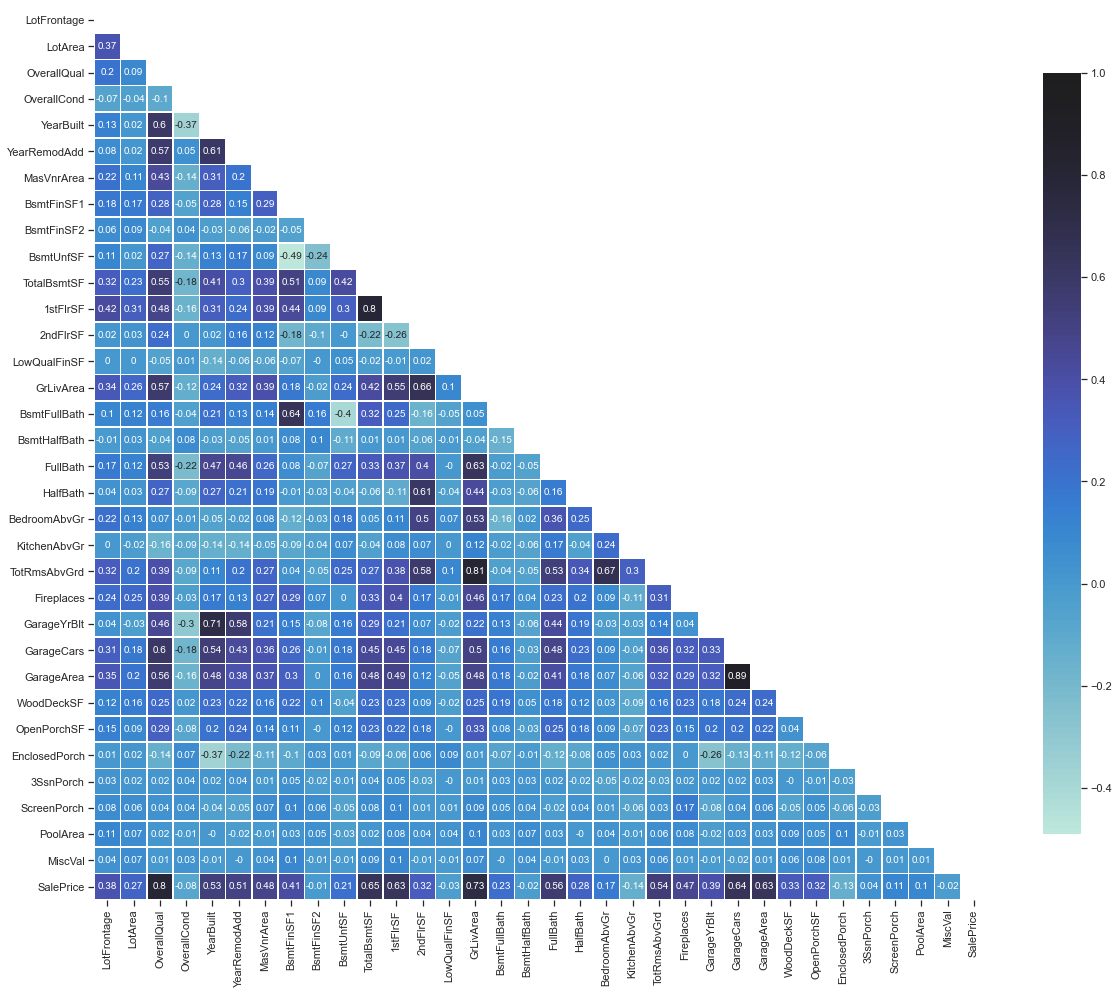

In [109]:
# Heatmap
corr= num_house_df.corr().round(2)
# create a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype= np.bool))
# set up the matplotlib figure
fig, ax= plt.subplots( figsize= (20,20))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, 
           center= True, annot= True, square= True, linewidth= 0.5, 
           cbar_kws={'shrink':0.7})

We have already seen correlations with SalePrice. Let's identify explanatory variables that have high correlation amongst themselves. 
* 1stFlrSF with TotalBsmtSF, (1st floor lies over the basement area)
* TotRmsAbvGr with GrLivArea, 
* YearBuilt with GarageYrBuilt 
* GarageArea with GarageCars as we suspected earlier.
 
we identify variables that are highly collinear (correlation>0.6)
* 'HalfBath' with '2ndFlrSF'
* 'GrLivArea' with '2ndFlrSF'
* 'BsmtFinSF1' with 'BsmtFullBath'
* 'GrLivArea' with 'FullBath'


We can choose to keep one of these variables with higher correlation to SalePrice and drop the others.
We drop : 1stFlrSF, TotRmsAbvGrd, GarageYrBlt and GarageArea.

There are other variables which are correlated with each other. Overall, the heatmap indicated the existence of multicollinearity. 

The listings have SF of Basement, 1st Floor and 2nd in individual columns which are correlated. We could create a new column combining all three into one- TotalSF and see how it fares against SalePrice and rest of the variables!





To summarize, we apply Box cox transformation and RobustScalar to high-skewed variables and just RobustScalar to low/no skewed variables and drop the above listed variables


In [0]:
num_features_df = num_house_df.drop(['SalePrice'], axis=1)
num_features_list= num_features_df.columns

In [0]:
y_train= num_house_df['SalePrice'].dropna()

So far, we studied the numerical variables, their relationship with SalePrice, correlations and distributions. We removed few extreme observations, and shortlisted variables with high skewness to be turned into 'normal' using Box Cox transformation. Further, our data contains features varying in magnitude, range and units. Although linear models aren't affected by it, algorithms that compute distance such as k-nearest neighbors, tree based models etc do. Hence, we apply RobustScalar so that the feature scaling method is robust to outliers.

Let's study the categorical features in our dataset.
## Categorical Features

Let's check how many categories each of the features has. A high number may pose a problem for our ML models

In [111]:
cat_unique=[]
for feature in cat_features_list:
  cat_unique_len = len(cat_features_df[feature].unique())
  cat_unique.append(cat_unique_len)

cat_unique_list= pd.DataFrame(data=cat_unique, index=cat_features_list, columns=['No. of unique labels'])
cat_unique_list_sort= cat_unique_list.sort_values(by= ['No. of unique labels'], ascending = False)
cat_unique_list_sort

No. of unique labels
Neighborhood                     25
Exterior2nd                      16
MSSubClass                       16
Exterior1st                      15
MoSold                           12
Condition1                        9
SaleType                          9
Condition2                        8
HouseStyle                        8
RoofMatl                          8
GarageType                        7
Functional                        7
BsmtFinType2                      7
BsmtFinType1                      7
GarageCond                        6
GarageQual                        6
FireplaceQu                       6
Foundation                        6
Heating                           6
SaleCondition                     6
RoofStyle                         6
ExterCond                         5
HeatingQC                         5
YrSold                            5
MiscFeature                       5
Fence                             5
Electrical                        5
LotConfig                         5
BldgType                          5
BsmtExposure                      5
BsmtQual                          5
MSZoning                          5
BsmtCond                          5
ExterQual                         4
GarageFinish                      4
LandContour                       4
PoolQC                            4
KitchenQual                       4
MasVnrType                        4
LotShape                          4
PavedDrive                        3
LandSlope                         3
Alley                             3
Utilities                         2
CentralAir                        2
Street                            2

Let's see if each of these variables affect the SalePrice. We will first draw pairplots to see if each of these variables have an effect on SalePrice

We will use swarmplot to also map the density of points.

In [112]:
cat_unique_list_sort.index

Index(['Neighborhood', 'Exterior2nd', 'MSSubClass', 'Exterior1st', 'MoSold',
       'Condition1', 'SaleType', 'Condition2', 'HouseStyle', 'RoofMatl',
       'GarageType', 'Functional', 'BsmtFinType2', 'BsmtFinType1',
       'GarageCond', 'GarageQual', 'FireplaceQu', 'Foundation', 'Heating',
       'SaleCondition', 'RoofStyle', 'ExterCond', 'HeatingQC', 'YrSold',
       'MiscFeature', 'Fence', 'Electrical', 'LotConfig', 'BldgType',
       'BsmtExposure', 'BsmtQual', 'MSZoning', 'BsmtCond', 'ExterQual',
       'GarageFinish', 'LandContour', 'PoolQC', 'KitchenQual', 'MasVnrType',
       'LotShape', 'PavedDrive', 'LandSlope', 'Alley', 'Utilities',
       'CentralAir', 'Street'],
      dtype='object')

In [163]:
cat_house_df= pd.concat([cat_features_df, house_all_data[['SalePrice','OverallQual']]], axis=1)
cat_house_df

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                              
1          RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
3          RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
5          RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
2915       RM   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
2916       RM   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
2917       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
2918       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
2919       RL   Pave  None      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
Id                                                                      
1         CollgCr       Norm       Norm     1Fam     2Story     Gable   
2         Veenker      Feedr       Norm     1Fam     1Story     Gable   
3         CollgCr       Norm       Norm     1Fam     2Story     Gable   
4         Crawfor       Norm       Norm     1Fam     2Story     Gable   
5         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
2915      MeadowV       Norm       Norm    Twnhs     2Story     Gable   
2916      MeadowV       Norm       Norm   TwnhsE     2Story     Gable   
2917      Mitchel       Norm       Norm     1Fam     1Story     Gable   
2918      Mitchel       Norm       Norm     1Fam     SFoyer     Gable   
2919      Mitchel       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
Id                                                                     
1     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
2     CompShg     MetalSd     MetalSd       None        TA        TA   
3     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
4     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
5     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
2915  CompShg     CemntBd     CmentBd       None        TA        TA   
2916  CompShg     CemntBd     CmentBd       None        TA        TA   
2917  CompShg     VinylSd     VinylSd       None        TA        TA   
2918  CompShg     HdBoard     Wd Shng       None        TA        TA   
2919  CompShg     HdBoard     HdBoard    BrkFace        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
Id                                                                         
1         PConc       Gd       TA           No          GLQ          Unf   
2        CBlock       Gd       TA           Gd          ALQ          Unf   
3         PConc       Gd       TA           Mn          GLQ          Unf   
4        BrkTil       TA       Gd           No          ALQ          Unf   
5         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
2915     CBlock       TA       TA           No          Unf          Unf   
2916     CBlock       TA       TA           No          Rec          Unf   
2917     CBlock       TA       TA           No          ALQ          Unf   
2918      PConc       Gd       TA           Av          GLQ          Unf   
2919      PConc       Gd       TA           Av          LwQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
Id  

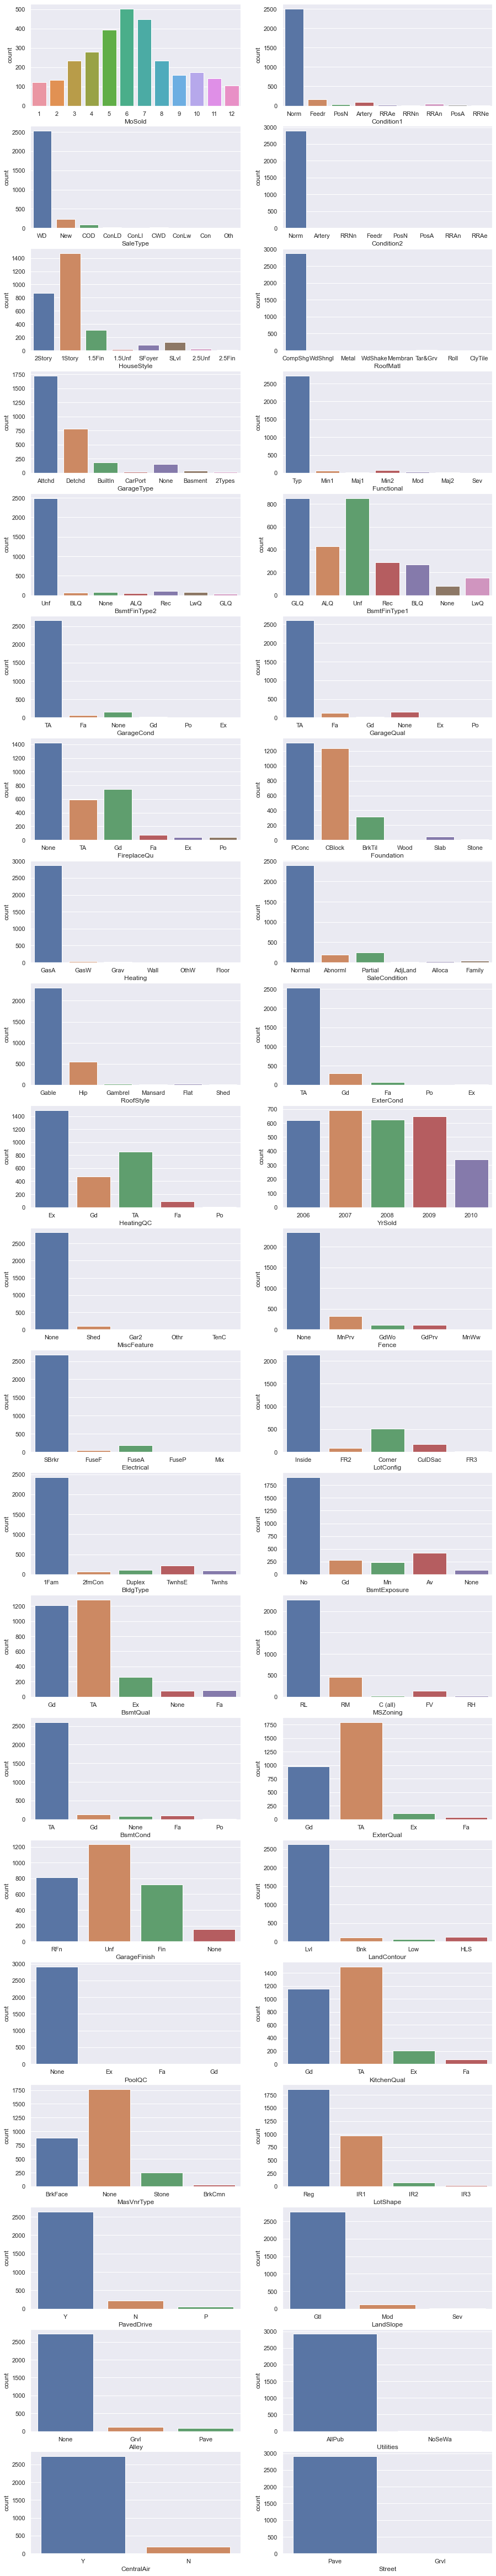

In [114]:
sns.set(rc={'figure.figsize':(15,85)})
fig, axes= plt.subplots(round(len(cat_unique_list_sort[4:])/2),2, sharex=False)
for ax, feature in zip(fig.axes, cat_unique_list_sort[4:].index):
  sns.countplot(cat_features_df[feature],ax=ax)

Let's start our analysis from bottom up. 

The variables  'CentralAir', 'Utilities', 'Street' have two labels. They can be converted to binary variables . 

The variables 'LandSlope', 'PavedDrive' have 3 labels. 

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

There are more buildings sold with gentle slope than otherwise. Similarly, with fully paved driveway than otherwise. Does this have an effect on SalePrice?

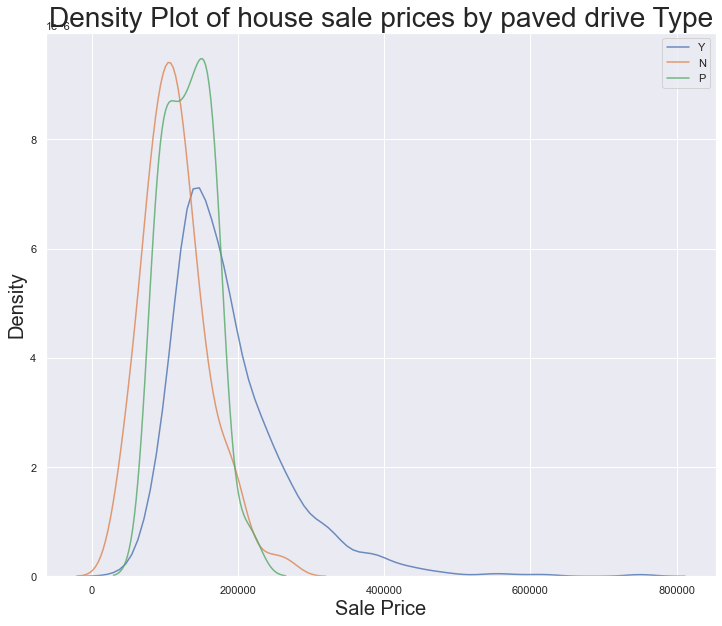

In [115]:
# Create a list of buildings 
types = cat_house_df['PavedDrive'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the paved drive type
    subset = cat_house_df[cat_house_df['PavedDrive'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by paved drive Type', size = 28);

From the density plot above, we can observe that the density plots of partial and dirt paved drives are more closely distributed than that of houses with fully paved drive ways. The mean price of dirt/gravel paved houses is definitely lower which implies that there is an effect of type of pavement on the house price. However, how significant , I'm not sure. I will one hot encode these categorical variables and let my ML model decide.


KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Most buildings sold had average kitchen quality followed by good. Very less kitchens were of excellent or fair. Almost no kitchens were of poor quality.

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Most buildings sold had either regular or slightly irregular lot shape. Very few buildings sold had large irregularities. 



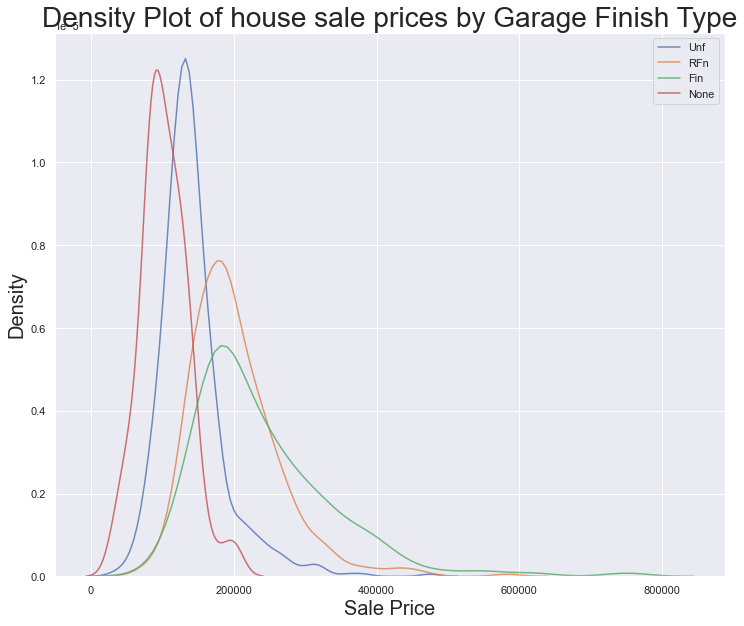

In [116]:
# Create a list of buildings 
types = cat_house_df['GarageFinish'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the garage finish type
    subset = cat_house_df[cat_house_df['GarageFinish'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by Garage Finish Type', size = 28);

From our denisty plot, we observe that houses with no garage command a lower price. We also look for other variables which have similar issue and correct them.

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Most buildings sold were nearly flat. 

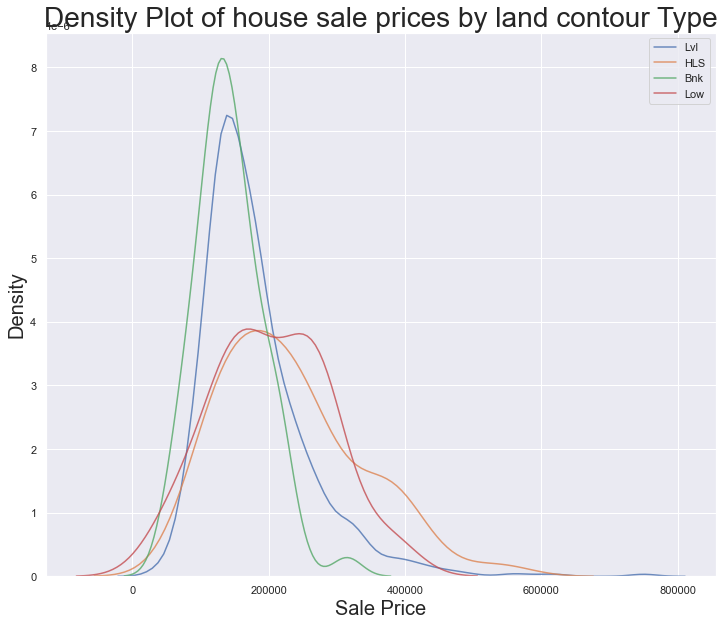

In [117]:
# Create a list of buildings 
types = cat_house_df['LandContour'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the land contour type
    subset = cat_house_df[cat_house_df['LandContour'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by land contour Type', size = 28);

One of my concerns was that I was creating too many dummy variables by 0ne hot encoding my categorical variables. 
So, within the Land contour category, I  wanted to keep Lvl and club rest of the labels into one due to their low values counts. But from the density plot above, I realize that although contour types banked and Hillside have same number of occurences within our dataset, they have varied effects on the sale price. Hence, I will continue to one-hot encode and let my ML model redice which variables are important.

Very few houses have no basement. Most of the houses sold had average height closely followed by good. The rest of the values are far and few in between. The basement condition for large majority is average. 

BsmtExposure: Refers to walkout or garden level walls


Most buildings don't have exposure        

	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Most buildings don't have a veener type. But brick face is a popular second.



Exterior condition is for most part average. Heating quality is mostly excellent, followed by average and good. 

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

Most buildings sold are 1Fam Type and few TwnhsE



MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Most of the houses sold are of Residencial Low Density followed by medium density. Very few houses are of Floating village residential  and even less are Residential High Density and Commercial.

       

	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
  Most houses sold are covered by houses on three sides except one frontage followed by corner lots. The next popular houses sold were that of cul-de-sac and frontage on 2 sides of the property.

Year Sold: Houses sold are equally spread between 2006-2009. However, 2010 records a lower number. It could be beacuse out dataset ends before the year is complete or sales in 2010 were affected by the 2008 financial crisis. We could look closer. Let's do a density plot.

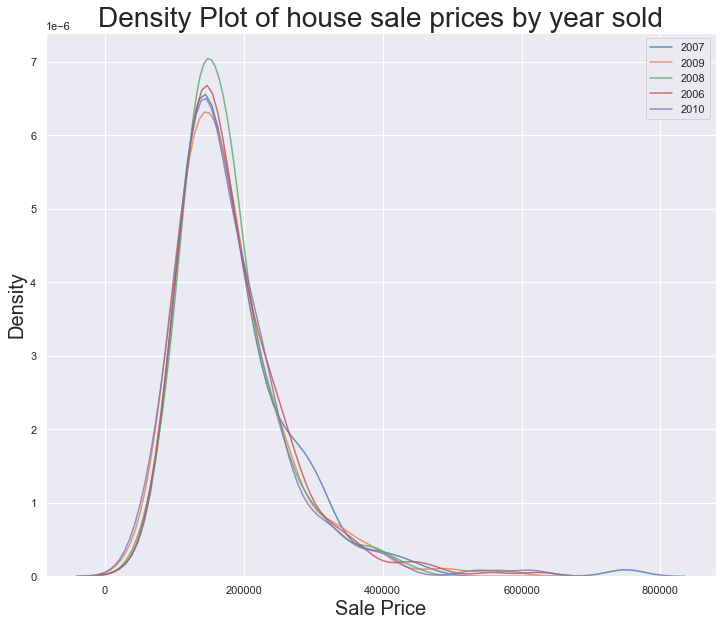

In [118]:
# Create a list of buildings 
types = cat_house_df['YrSold'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the land contour type
    subset = cat_house_df[cat_house_df['YrSold'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by year sold', size = 28);

From our plot, we observe that the year sold doesn't have an effect on sale price. We can safely drop the variable. 

Under roofstyle, the most popular one is that of gable which is a classic style in that part of the world. The style 'hip' is again similar that all the roofs are downward sloping. 

Sale condition: Most sales made are normal. 
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

And the sale type is conventional- Warranty Deed.       

The most popular style of foundations were poured concrete and cinder block. Few houses had brick and tile , and even fewer has either slab or stone

Almost all of the garages were in average condition and has average quality. The houses have GasA type of heating and standard electrical system.

All houses had standard (composite) shingle roof material and this feature can be ignored in our model.	
 

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
Most of the houses had attached garage followed by detached and built in garage styles. 

In [0]:
cat_house_df['GarageType'].fillna('No Garage', inplace=True)

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)  



Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
Almost all the houses have typical functionality       

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
The majority of the buildings sold were 1st followed by 2nd story. The other types 1.5Fin and split were less popular.       

Month Sold: While I considered the year sold and year remodelled to be numercial variables, I took the month sold as a categorical variable. From our countplot, it is clear that the months 5,6,7 have highest number of sales. Is it because the activity is generally higher in Spring and Summer months? 

To not cluster the plot, I'm plotting the density plot as per season.

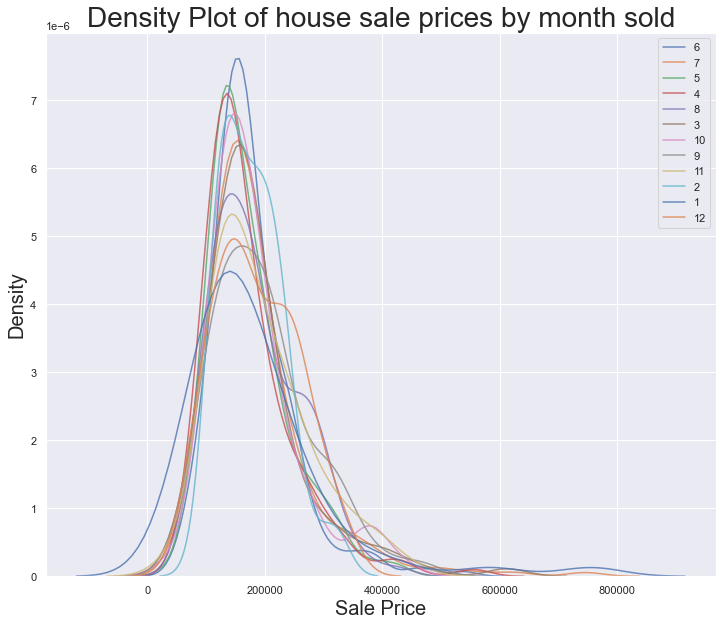

In [120]:
# Create a list of buildings 
types = cat_house_df['MoSold'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the land contour type
    subset = cat_house_df[cat_house_df['MoSold'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by month sold', size = 28);

While the seasons had varying number of houses sold, they didn't affect the sale price of the house itself. It does make sense as Month isn't a feature one considers while buying a house!
I'm going to drop it from my feature list. 

 
       
let's look at the rest of the variables
'Neighborhood', 'Exterior2nd', 'MSSubClass' and 'Exterior1st', 

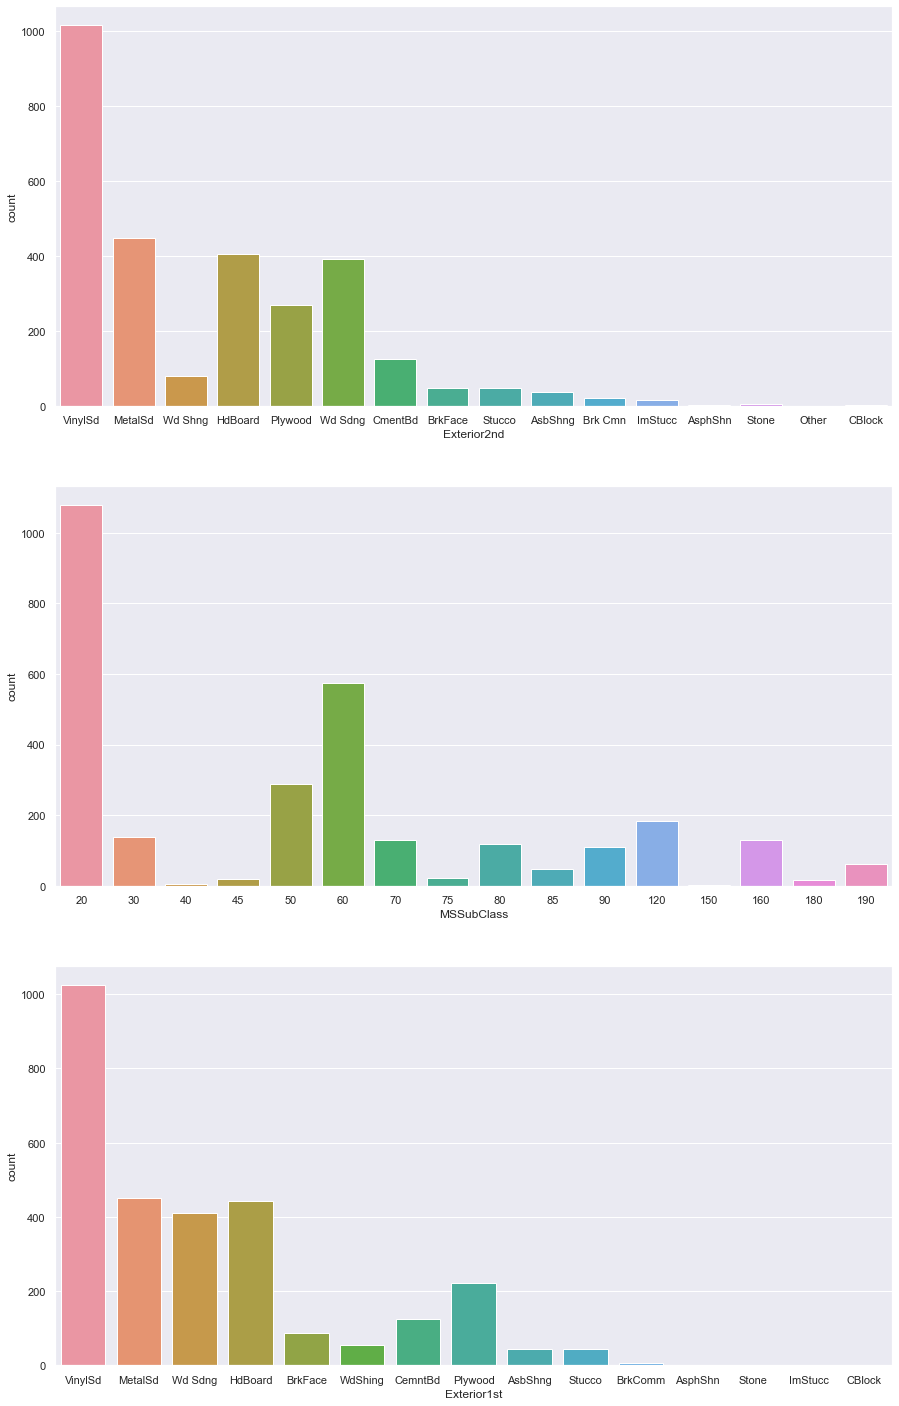

In [121]:
sns.set(rc={'figure.figsize':(15,25)})
fig, axes= plt.subplots(round(len(cat_unique_list_sort[1:4])),1, sharex=False)
for ax, feature in zip(fig.axes, cat_unique_list_sort[1:4].index):
  sns.countplot(cat_house_df[feature],ax=ax)

		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
Exterior2nd: Exterior covering on house (if more than one material)

Most popular option for 1st exterior covering omn the house is vinyl sliding followed by metal,wood and hard board. The other options were used on 100 houses or less.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Majority of the houses are  type 20 followed by type 60. That is either 1 story or 2 story 1946 and newer style. The next popular ones are types 50,120, 30 80 and so on. However, we obtained similar information from the variable 'HouseStyle'. 

let's look at our last categorical variable: Neighborhood
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [122]:
cat_house_df[cat_unique_list_sort.index[0]].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

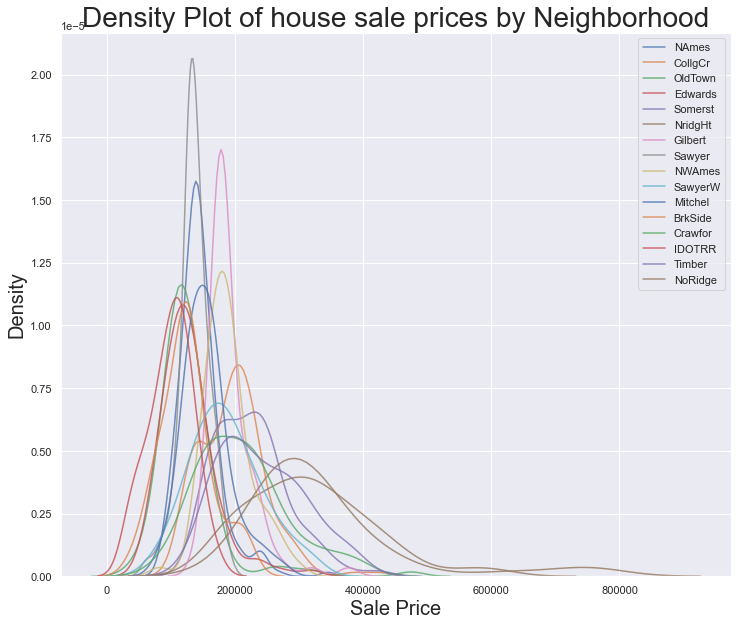

In [123]:
# Create a list of with more than 70 buildings 
types = cat_house_df['Neighborhood'].value_counts()
types= list(types[types.values > 70].index)
# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the neighborhood
    subset = cat_house_df[cat_house_df['Neighborhood'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by Neighborhood', size = 28);

Some neighborhoods seem to be more expensive than the others. Let's see if that's because of the quality of house listings.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

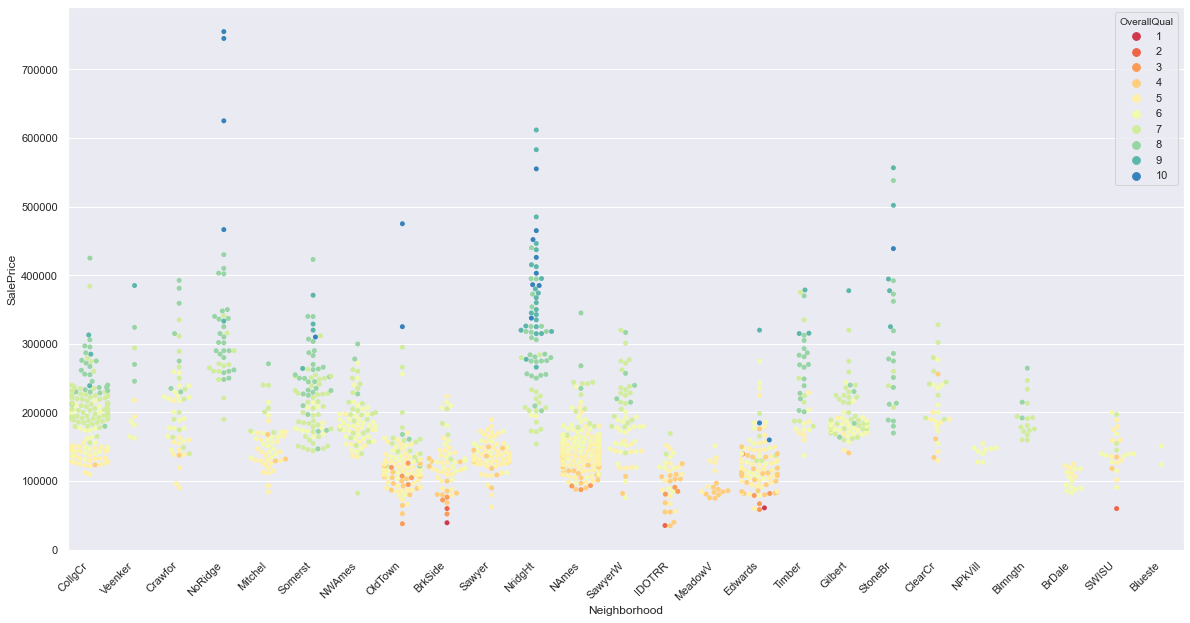

In [164]:

figsize(20,10)
sns.swarmplot(x= 'Neighborhood', y= 'SalePrice', hue= 'OverallQual', data= cat_house_df, palette='Spectral')
plt.xticks(rotation=45,horizontalalignment='right')

Neighborhoods North Ridge, North Ridge heights and Stone Brook seem to have higher proportion of high quality houses compared to the rest. Neighborhoods such as Sawyer, Meadow Village, Northpark Villa, Briardale and Bluestem have medium quality houses and the rest have a mix. 

Only two houses of all the houses sold were from Bluestem and they happen to be of quality score 6. Nothing too suspicious. So,we move on. 

With this, we conclude our visualization of categorical variables.

To quickly summarize what we did under this section:
We listed our categorical variables and sorted them according to the number of unique labels in each. We then plotted respected count plots and density plots for a few features to see if the labels within a category affect our target variable- SalePrice. 

Although more number of houses are sold in months of May, June and July, our density plot shows that these months don’t affect the Sale price of the house. We also observe that the variable MSSubClass represents the same data as ‘HouseStyle’. We can drop both of these variables.

Next, we need to drop some variables and one-hot code the rest. 


# Feature Selection and Engineering
I have already chosen the most relevant features from my data through EDA earlier. This is an iterative process and I will use the results of random forest to further pick my explanatory variables. 



We start with categorical  variables followed by numerical.

In [0]:
# creating df with shortlisted variables post EDA
cat_var_drop=['MSSubClass','MoSold', 'YrSold']
cat_features_df.drop(cat_var_drop, axis=1, inplace= True)


Let's get dummy variables for categorical features. For features with two unique variables, we can drop the first label and for the rest, we let the default option drop_first= False. 


In [126]:
two_list= ['Street','Utilities','CentralAir']
cat_transform_df= pd.DataFrame(index= cat_features_df.index)
for feature in cat_features_df.columns:
  if feature in two_list:
    two_dum= pd.get_dummies(cat_features_df[feature], prefix=feature, drop_first=True)
    cat_transform_df= pd.concat([cat_transform_df,two_dum ], axis=1)
    
  else:
    n_dum= pd.get_dummies(cat_features_df[feature], prefix=feature)
    cat_transform_df= pd.concat([cat_transform_df, n_dum ], axis=1)
cat_transform_df

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                           
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
5                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
2915                 0            0            0            0            1   
2916                 0            0            0            0            1   
2917                 0            0            0            1            0   
2918                 0            0            0            1            0   
2919                 0            0            0            1            0   

      Street_Pave  Alley_Grvl  Alley_None  Alley_Pave  LotShape_IR1  \
Id                                                                    
1               1           0           1           0             0   
2               1           0           1           0             0   
3               1           0           1           0             1   
4               1           0           1           0             1   
5               1           0           1           0             1   
...           ...         ...         ...         ...           ...   
2915            1           0           1           0             0   
2916            1           0           1           0             0   
2917            1           0           1           0             0   
2918            1           0           1           0             0   
2919            1           0           1           0             0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
Id                                                                
1                0             0             1                0   
2                0             0             1                0   
3                0             0             0                0   
4                0             0             0                0   
5                0             0             0                0   
...            ...           ...           ...              ...   
2915             0             0             1                0   
2916             0             0             1                0   
2917             0             0             1                0   
2918             0             0             1                0   
2919             0             0             1                0   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
Id                                                                          
1                   0                0                1                 0   
2                   0                0                1                 0   
3                   0                0                1                 0   
4                   0                0                1                 0   
5                   0                0                1                 0   
...               ...              ...              ...               ...   
2915                0                0                1                 0   
2916                0                0                1                 0   
2917                0                0                1                 0   
2918                0                0                1                 0   
2919                0                0                1                 0   

      LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                        
1                    0                  0  

In [165]:
num_features_df

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1            65.0     8450            7            5       2003          2003   
2            80.0     9600            6            8       1976          1976   
3            68.0    11250            7            5       2001          2002   
4            60.0     9550            7            5       1915          1970   
5            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
2915         21.0     1936            4            7       1970          1970   
2916         21.0     1894            4            5       1970          1970   
2917        160.0    20000            5            7       1960          1996   
2918         62.0    10441            5            5       1992          1992   
2919         74.0     9627            7            5       1993          1994   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
Id                                                                           
1          196.0       706.0         0.0      150.0        856.0       856   
2            0.0       978.0         0.0      284.0       1262.0      1262   
3          162.0       486.0         0.0      434.0        920.0       920   
4            0.0       216.0         0.0      540.0        756.0       961   
5          350.0       655.0         0.0      490.0       1145.0      1145   
...          ...         ...         ...        ...          ...       ...   
2915         0.0         0.0         0.0      546.0        546.0       546   
2916         0.0       252.0         0.0      294.0        546.0       546   
2917         0.0      1224.0         0.0        0.0       1224.0      1224   
2918         0.0       337.0         0.0      575.0        912.0       970   
2919        94.0       758.0         0.0      238.0        996.0       996   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                              
1          854             0       1710           1.0           0.0         2   
2            0             0       1262           0.0           1.0         2   
3          866             0       1786           1.0           0.0         2   
4          756             0       1717           1.0           0.0         1   
5         1053             0       2198           1.0           0.0         2   
...        ...           ...        ...           ...           ...       ...   
2915       546             0       1092           0.0           0.0         1   
2916       546             0       1092           0.0           0.0         1   
2917         0             0       1224           1.0           0.0         1   
2918         0             0        970           0.0           1.0         1   
2919      1004             0       2000           0.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                     
1            1             3             1             8           0   
2            0             3             1             6           1   
3            1             3             1             6           1   
4            0             3             1             7           1   
5            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
2915         1             3             1             5           0   
2916         1             3             1             6           0   
2917         0             4             1             7           1   
2918         0             3             1             6           0   
2919         1     


First we remove highly collinear features as they decrease our model performace. I adapted the following code from [stackoverflow](https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on/43104383#43104383)

In [0]:
def remove_corr_features(df, thresh):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df , exluding the target variable
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= thresh:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = df.iloc[:, (i+1):(i+2)].columns.values
        df = df.drop(col, axis=1)

    return df

In [213]:
num_transform_df= remove_corr_features(num_features_df, 0.6)
num_transform_df

YearBuilt | OverallQual | 0.6
GrLivArea | 2ndFlrSF | 0.66
BsmtFullBath | BsmtFinSF1 | 0.64
FullBath | GrLivArea | 0.63
HalfBath | 2ndFlrSF | 0.61
TotRmsAbvGrd | GrLivArea | 0.81
TotRmsAbvGrd | BedroomAbvGr | 0.67
GarageYrBlt | YearBuilt | 0.71
GarageCars | OverallQual | 0.6


LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
Id                                                                   
1            65.0     8450            7            5          2003   
2            80.0     9600            6            8          1976   
3            68.0    11250            7            5          2002   
4            60.0     9550            7            5          1970   
5            84.0    14260            8            5          2000   
...           ...      ...          ...          ...           ...   
2915         21.0     1936            4            7          1970   
2916         21.0     1894            4            5          1970   
2917        160.0    20000            5            7          1996   
2918         62.0    10441            5            5          1992   
2919         74.0     9627            7            5          1994   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
Id                                                                           
1          196.0       706.0         0.0      150.0        856.0       856   
2            0.0       978.0         0.0      284.0       1262.0      1262   
3          162.0       486.0         0.0      434.0        920.0       920   
4            0.0       216.0         0.0      540.0        756.0       961   
5          350.0       655.0         0.0      490.0       1145.0      1145   
...          ...         ...         ...        ...          ...       ...   
2915         0.0         0.0         0.0      546.0        546.0       546   
2916         0.0       252.0         0.0      294.0        546.0       546   
2917         0.0      1224.0         0.0        0.0       1224.0      1224   
2918         0.0       337.0         0.0      575.0        912.0       970   
2919        94.0       758.0         0.0      238.0        996.0       996   

      2ndFlrSF  LowQualFinSF  BsmtHalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                       
1          854             0           0.0             3             1   
2            0             0           1.0             3             1   
3          866             0           0.0             3             1   
4          756             0           0.0             3             1   
5         1053             0           0.0             4             1   
...        ...           ...           ...           ...           ...   
2915       546             0           0.0             3             1   
2916       546             0           0.0             3             1   
2917         0             0           0.0             4             1   
2918         0             0           1.0             3             1   
2919      1004             0           0.0             3             1   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                                                                     
1              0       548.0           0           61              0   
2              1       460.0         298            0              0   
3              1       608.0           0           42              0   
4              1       642.0           0           35            272   
5              1       836.0         192           84              0   
...          ...         ...         ...          ...            ...   
2915           0         0.0           0            0              0   
2916           0       286.0           0           24              0   
2917           1       576.0         474            0              0   
2918           0         0.0          80           32              0   
2919           1       650.0         190           48              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  
Id                                               
1             0            0         0        0  
2             0            0  

Let's look the skewness of the features and make highly skewed one more normal. 

[As a general rule of thumb:](https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis) If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

So, we apply box cox transformation to variables whose absolute value of sknewness is above 0.65 

This transformation technique modifies the distribution of our variable so that its residuals more normally distributed. We need to estimate lambda from our training set. The value of lambda usually lies between -5 and 5 and controls the type of transformation

[Below are some common values for lambda](https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/)

* lambda = -1. is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

I obtain lambda by using only the train dataset and apply it wholly.

In [245]:
from scipy.stats import skew
# check skewness in our numerical features before applying box cox transformation
skew_features= num_transform_df.apply(lambda x: skew(x))
skew_features.sort_values(ascending= False)

MiscVal          21.932147
PoolArea         17.682542
LotArea          13.139104
LowQualFinSF     12.080315
3SsnPorch        11.368094
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.928397
MasVnrArea        2.606098
OpenPorchSF       2.487278
WoodDeckSF        1.844156
1stFlrSF          1.259628
BsmtFinSF1        0.980011
BsmtUnfSF         0.920887
2ndFlrSF          0.861752
Fireplaces        0.726443
TotalBsmtSF       0.676432
LotFrontage       0.637325
OverallCond       0.566054
BedroomAbvGr      0.327471
GarageArea        0.218844
OverallQual       0.186352
YearRemodAdd     -0.449079
dtype: float64

In [0]:
train_len = len(y_train.index)

In [255]:
lot_bcx, lam = boxcox(num_transform_df['LotArea'].iloc[1:train_len])
lam

0.04108420963809489

In [244]:
y_train.skew()
from scipy import stats
y_train_bcx, lam= stats.boxcox(y_train)
lam

-0.0782284443543878

In [249]:
y_train_bcx_df= pd.DataFrame(data=y_train_bcx, index= y_train.index, columns=['SalePrice_bcx'])
y_train_bcx_df

SalePrice_bcx
Id                 
1          7.879306
2          7.825816
3          7.905884
4          7.724109
5          7.948448
...             ...
1456       7.811652
1457       7.882055
1458       7.972560
1459       7.730067
1460       7.744719

[1456 rows x 1 columns]

I am choosing my lambda value to be close to 0. It translates to a log transformation, as did my target variable 'SalePrice' earlier. 

In [212]:
# Shortlist variables for box cox transformation
skew_features_shortlist= skew_features[abs(skew_features) > 0.65]
print('There are {} variables for Box Cox Transformation'.format(len(skew_features_shortlist)))

There are 19 variables for Box Cox Transformation


In [215]:
num_transformed_df= pd.DataFrame(index= num_transform_df.index)
from scipy.special import boxcox1p
lam= 0.05
for feature in num_transform_df.columns:
  if feature in skew_features_shortlist.index:
    num_transformed_df[feature] = boxcox1p(num_transform_df[feature], lam )
  else:
    num_transformed_df[feature]= num_transform_df[feature]

num_transformed_df


LotFrontage    LotArea  OverallQual  OverallCond  YearRemodAdd  \
Id                                                                     
1            65.0  11.432245            7            5          2003   
2            80.0  11.633396            6            8          1976   
3            68.0  11.885230            7            5          2002   
4            60.0  11.625139            7            5          1970   
5            84.0  12.265433            8            5          2000   
...           ...        ...          ...          ...           ...   
2915         21.0   9.200244            4            7          1970   
2916         21.0   9.168256            4            5          1970   
2917        160.0  12.815769            5            7          1996   
2918         62.0  11.766486            5            5          1992   
2919         74.0  11.637838            7            5          1994   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
Id                                                                           
1       6.046736    7.765210         0.0   5.702706     8.033611  8.033611   
2       0.000000    8.220788         0.0   6.532137     8.582497  8.582497   
3       5.801169    7.252506         0.0   7.099074     8.134745  8.134745   
4       0.000000    6.172968         0.0   7.396170     7.860236  8.196081   
5       6.809910    7.661466         0.0   7.263655     8.443905  8.443905   
...          ...         ...         ...        ...          ...       ...   
2915    0.000000    0.000000         0.0   7.411283     7.411283  7.411283   
2916    0.000000    6.374608         0.0   6.577927     7.411283  7.411283   
2917    0.000000    8.538872         0.0   0.000000     8.538872  8.538872   
2918    0.000000    6.759367         0.0   7.482176     8.122475  8.209212   
2919    5.114017    7.863912         0.0   6.299645     8.246507  8.246507   

      2ndFlrSF  LowQualFinSF  BsmtHalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                       
1     8.030336           0.0      0.000000             3      0.705298   
2     0.000000           0.0      0.705298             3      0.705298   
3     8.049876           0.0      0.000000             3      0.705298   
4     7.860236           0.0      0.000000             3      0.705298   
5     8.325137           0.0      0.000000             4      0.705298   
...        ...           ...           ...           ...           ...   
2915  7.411283           0.0      0.000000             3      0.705298   
2916  7.411283           0.0      0.000000             3      0.705298   
2917  0.000000           0.0      0.000000             4      0.705298   
2918  0.000000           0.0      0.705298             3      0.705298   
2919  8.257797           0.0      0.000000             3      0.705298   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                                                                     
1       0.000000       548.0    0.000000     4.583832       0.000000   
2       0.705298       460.0    6.595830     0.000000       0.000000   
3       0.705298       608.0    0.000000     4.138119       0.000000   
4       0.705298       642.0    0.000000     3.924624       6.475132   
5       0.705298       836.0    6.020034     4.974738       0.000000   
...          ...         ...         ...          ...            ...   
2915    0.000000         0.0    0.000000     0.000000       0.000000   
2916    0.000000       286.0    0.000000     3.492379       0.000000   
2917    0.705298       576.0    7.218531     0.000000       0.000000   
2918    0.000000         0.0    4.914619     3.820764       0.000000   
2919    0.705298       650.0    6.006485     4.296281       0.000000   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal  
Id                                                
1           0.0          0.0       0.0  0.000000  
2

Let's combine the numerical and categorical features into one dataframe

In [0]:
all_features_df= pd.concat([num_transformed_df, cat_transform_df], axis=1)
all_features_df = all_features_df.dropna()

In [271]:
x_train = all_features_df.iloc[:train_len]
x_test = all_features_df.iloc[train_len:]
y_train= y_train_bcx_df
print('The shape of x_train is: {} y_train :{} and x_test is:{}'.format(x_train.shape, y_train.shape, x_test.shape))

The shape of x_train is: (1456, 288) y_train :(1456, 1) and x_test is:(1459, 288)


Let's save our dataset to be used for the following steps

In [0]:
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# Conclusion

In this notebook, we 
1. Cleaned and formatted raw data
2. Performed Exploratory Data Analysis
3. Shortlisted variables to be used for model training 

In the next notebook, we will establish a baseline model, implement several ML methods, optimize them using hyperparameter tuning and cross validation. 